In [1]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras

from keras import backend as K
K.set_image_data_format("channels_last")

from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation
from keras.optimizers import SGD,RMSprop,Adam,Nadam

#from keras.callbacks import ModelCheckpoint as MCP ,EarlyStopping as ESP, ReduceLROnPlateau as RLP
from tensorflow.keras.callbacks import ModelCheckpoint as MCP ,EarlyStopping as ESP, ReduceLROnPlateau as RLP

Using TensorFlow backend.


In [2]:
path=r'C:\Users\mishr\CNN\AUGUMENTED\cv2'
directories = os.listdir(path)
directories

['SAREE', 'SHIRT', 'TSHIRT']

In [3]:
#i'll resize the all the images to a standard size of 128*128
im_hg=128
im_wg=128
channel=1 #as all my images are grey scale

In [4]:
#creating a list to store the images extracted         
imgs=[]
for ds in directories:
    img_list=os.listdir(path+'/'+ ds)
    print ('Extracting images from',(ds))
    
    for i in img_list:
        input_img=cv2.imread(path + '/'+ ds + '/'+ i )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        img_resize=cv2.resize(input_img,(128,128))
        imgs.append(img_resize)
           
img_data = np.array(imgs).astype('float32')
img_data =img_data/255 #normalization

print (img_data.shape)

Extracting images from SAREE
Extracting images from SHIRT
Extracting images from TSHIRT
(1800, 128, 128)


In [5]:
#checking channel configuration
if channel==1:
    if K.image_data_format()==("channels_first"):
    
        img_data= np.expand_dims(img_data, axis=1) 
        print("Theano ordering has been used /n")
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=3) 
        print("Tensorflow ordering has been used")
        print (img_data.shape)
else:
    if K.image_data_format()==("channels_first"):
        img_data=np.rollaxis(img_data,3,1)  # here roll axis is for bringing the 3rd axis to 1st axis 
        print (img_data.shape)

Tensorflow ordering has been used
(1800, 128, 128, 1)


In [6]:
classes=3
class_name=["SAREE","SHIRT",'TSHIRT']
sample_length=img_data.shape[0]

labels = np.ones((sample_length,),dtype="int64") #it'll create a matrix of 1*1

#assigning values, we know that we have 600 images in each folder so assigning values according to them

labels[0:600]=0
labels[600:1200]=1
labels[1200:1800]=2

In [7]:
#using one_hot encoding
Y=np_utils.to_categorical(labels,classes)

In [8]:
#using shuffle and train_test_split methods of sklearn for shuffling and splitting the dataset
x,y = shuffle(img_data,Y, random_state=4)

# Splitting the dataset in 80_20 ratio 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
#splitting the dataset into 80:20 will give 1440 images for training and 360 for testing

In [9]:
print("Shape of x_train:\t",x_train.shape)
print("\nShape of x_test:\t",x_test.shape)
print("\nShape of y_train:\t",y_train.shape)
print("\nShape of y_test:\t",y_test.shape)

Shape of x_train:	 (1440, 128, 128, 1)

Shape of x_test:	 (360, 128, 128, 1)

Shape of y_train:	 (1440, 3)

Shape of y_test:	 (360, 3)


In [10]:
ip_shape=img_data[0].shape
ip_shape
#here we have single channel images of 128*128 resolution

(128, 128, 1)

In [11]:
#BUILDING THE LAYOUT OF CNN MODEL

m=Sequential(name="SCRAPPED_IMAGE_DATASET")
m.add(Conv2D(32,(3,3),name="Conv_1",activation="relu",kernel_initializer='he_uniform',padding='same',input_shape=ip_shape))
m.add(MaxPooling2D(pool_size = (2,2)))

m.add(Conv2D(64,(3,3),name="Conv_2",activation="relu",kernel_initializer='he_uniform',padding='same'))
m.add(MaxPooling2D(pool_size = (2,2)))      
m.add(Dropout(0.5))
      
m.add(Conv2D(64, (3, 3), activation='relu',name="Conv_3" ,kernel_initializer='he_uniform', padding='same'))
m.add(MaxPooling2D((2, 2)))


m.add(Flatten())
      
m.add(Dense(64, activation='relu', kernel_initializer='he_uniform',name="HIDDEN_1"))
m.add(Dense(128, activation='relu', kernel_initializer='he_uniform',name="HIDDEN_2"))    
m.add(Dropout(0.5))
m.add(Dense(3, activation='softmax',name="OUTPUT"))
print("\nSummary:",m.summary())

Model: "SCRAPPED_IMAGE_DATASET"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 

In [12]:
#checking model configuration
m.get_config()

{'name': 'SCRAPPED_IMAGE_DATASET',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'Conv_1',
    'trainable': True,
    'batch_input_shape': (None, 128, 128, 1),
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 2.0,
      'mode': 'fan_in',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'MaxPooling2D',
   'config': {'name': 'max_pooling2d',
    'trainable': True,
    'dtype': 'float32',
    'pool_size': (2, 2),
    'padding': 'valid',
    'strides': (2, 2),
    'data_format'

**compiling the  model with SGD as optimizer with momentum & callbacks**

AT LEARNING RATE 0.001
______________________________

Epoch 1/20
72/72 [==============================] - ETA: 0s - loss: 1.2354 - accuracy: 0.4684
Epoch 00001: val_loss improved from inf to 0.87714, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_momt0.001.h5
72/72 [==============================] - 53s 740ms/step - loss: 1.2354 - accuracy: 0.4684 - val_loss: 0.8771 - val_accuracy: 0.6611 - lr: 0.0010
Epoch 2/20
72/72 [==============================] - ETA: 0s - loss: 0.7698 - accuracy: 0.6011
Epoch 00002: val_loss improved from 0.87714 to 0.75582, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_momt0.001.h5
72/72 [==============================] - 51s 705ms/step - loss: 0.7698 - accuracy: 0.6011 - val_loss: 0.7558 - val_accuracy: 0.6028 - lr: 0.0010
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 0.6590 - accuracy: 0.6528
Epoch 00003: val_loss improved from 0.75582 to 0.60320, saving model to C:\Users\mishr\CNN\p4_saved_model\g

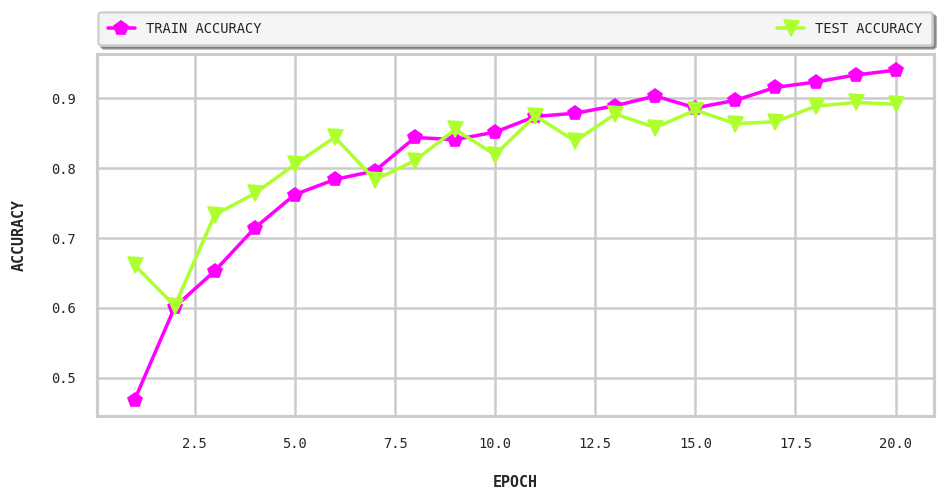


LOSS VALUES


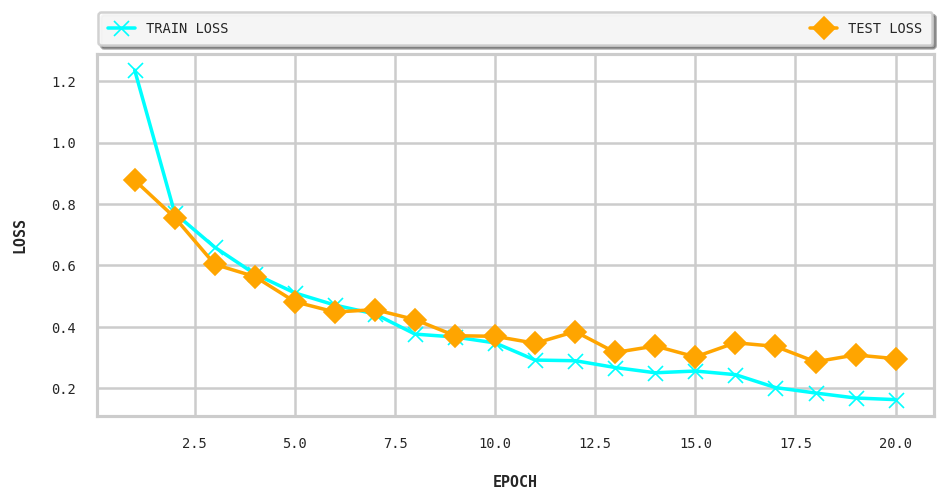


AT LEARNING RATE 0.01
______________________________

Epoch 1/20
72/72 [==============================] - ETA: 0s - loss: 0.6766 - accuracy: 0.6991
Epoch 00001: val_loss improved from inf to 0.60017, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_momt0.01.h5
72/72 [==============================] - 44s 616ms/step - loss: 0.6766 - accuracy: 0.6991 - val_loss: 0.6002 - val_accuracy: 0.7250 - lr: 0.0100
Epoch 2/20
72/72 [==============================] - ETA: 0s - loss: 0.5399 - accuracy: 0.7446
Epoch 00002: val_loss improved from 0.60017 to 0.48700, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_momt0.01.h5
72/72 [==============================] - 45s 624ms/step - loss: 0.5399 - accuracy: 0.7446 - val_loss: 0.4870 - val_accuracy: 0.7417 - lr: 0.0100
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 0.4202 - accuracy: 0.7963
Epoch 00003: val_loss improved from 0.48700 to 0.44816, saving model to C:\Users\mishr\CNN\p4_saved_model\gar

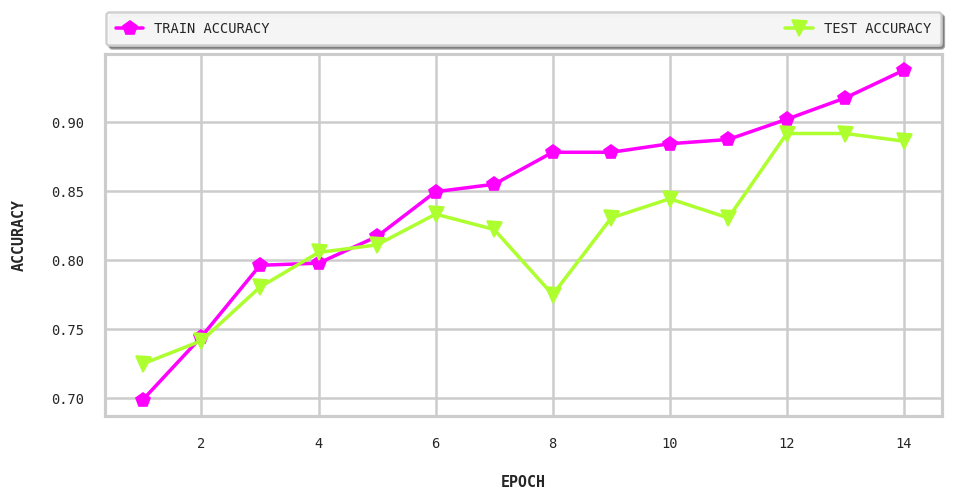


LOSS VALUES


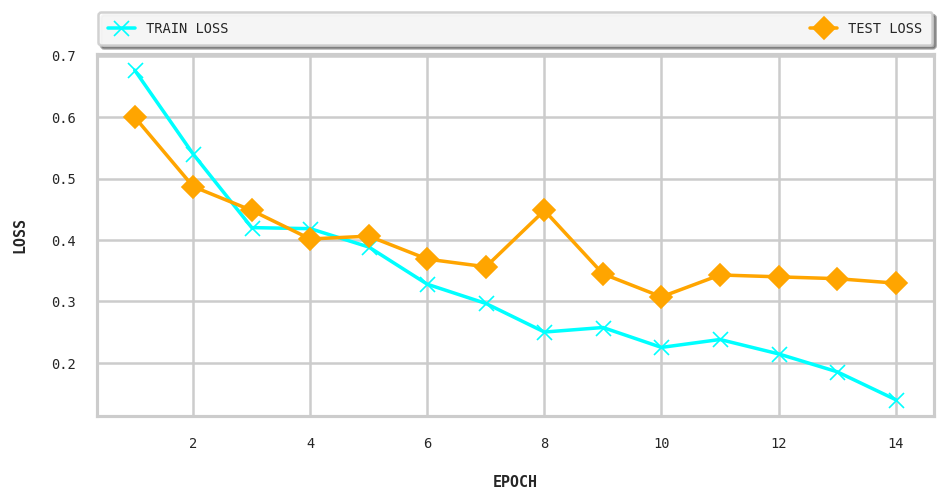


AT LEARNING RATE 0.025
______________________________

Epoch 1/20
72/72 [==============================] - ETA: 0s - loss: 0.3672 - accuracy: 0.8333
Epoch 00001: val_loss improved from inf to 0.63023, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_momt0.025.h5
72/72 [==============================] - 46s 638ms/step - loss: 0.3672 - accuracy: 0.8333 - val_loss: 0.6302 - val_accuracy: 0.7111 - lr: 0.0250
Epoch 2/20
72/72 [==============================] - ETA: 0s - loss: 0.3914 - accuracy: 0.8333
Epoch 00002: val_loss improved from 0.63023 to 0.46876, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_momt0.025.h5
72/72 [==============================] - 45s 625ms/step - loss: 0.3914 - accuracy: 0.8333 - val_loss: 0.4688 - val_accuracy: 0.7639 - lr: 0.0250
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 0.3977 - accuracy: 0.8333
Epoch 00003: val_loss improved from 0.46876 to 0.43346, saving model to C:\Users\mishr\CNN\p4_saved_model\

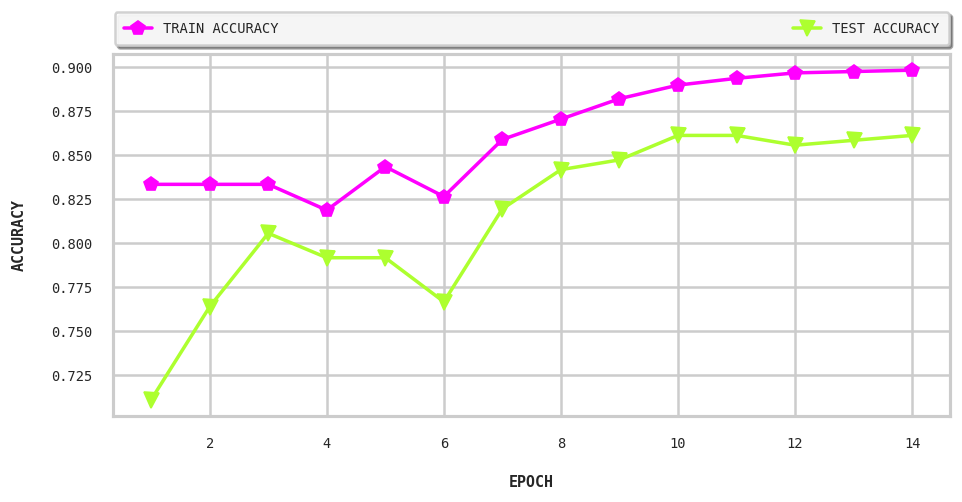


LOSS VALUES


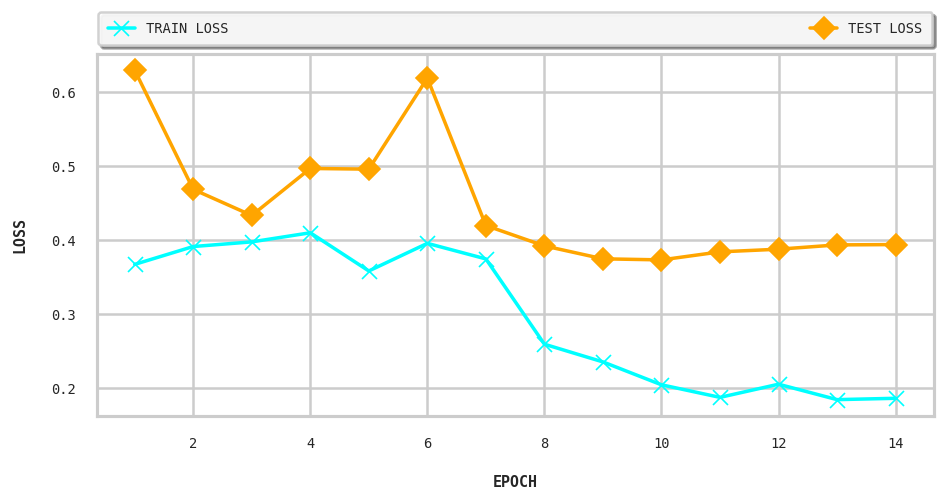

In [13]:
lr=(0.001,0.01,0.025)
for i in (lr):
    print("AT LEARNING RATE",i)
    print("__"*15)
    print()     
    opt = SGD(learning_rate=i, momentum=0.9,nesterov=False)
    m.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    
 #defining the callbacks   
    check= MCP(r"C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_momt"+str(i)+".h5",
          monitor='val_loss', verbose=1,save_best_only=True,save_weights_only=False, mode='min')

    early=ESP(monitor='val_loss', min_delta=0, patience=4, verbose=1, mode='min',baseline=None, restore_best_weights=True)
    rlp=RLP(monitor='val_loss',factor=0.1, patience=3, verbose=1, mode='min',min_delta=0)
    cb=[early,check,rlp]
    
#training the dataset
    sgd_momt = m.fit(x_train,y_train,batch_size =18,epochs=20,steps_per_epoch=np.floor(len(x_train)//20),
                     validation_data = (x_test, y_test),callbacks=cb)

#predicting the results for test dataset
    print("\npredicting the model performance wrt test dataset")
    prediction= m.evaluate(x_test, y_test)
    prediction 
    print("\nPrediction_TEST LOSS:\t",prediction[0]*100)
    print("\nPrediction_TEST ACCURACY:\t",prediction[1]*100)
    print()
    
    
    
#visualization
   
    record= sgd_momt.history
    loss=record['loss']
    acc=record['accuracy']
    valid_loss=record['val_loss']
    val_acu=record['val_accuracy']
    epoch=range(1,len(loss)+1)
    
    #PLOTTING ACCURACY VALUES
    print('Accuracy Value')
    plt.figure(figsize=(9,4),dpi=120)
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.5)
    l1=plt.plot(epoch,acc,label="TRAIN ACCURACY")
    l2=plt.plot(epoch,val_acu,label="TEST ACCURACY")

    plt.setp(l1,color='fuchsia',marker="p",linewidth=2.1)
    plt.setp(l2,color='greenyellow',marker="v",linewidth=2.1)

    plt.xlabel('\nEPOCH',weight='bold')
    plt.ylabel('ACCURACY\n',weight='bold')
    plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1)
    
    plt.show()
    
    
#PLOTTING LOSS VALUES
    print("\nLOSS VALUES")
    plt.figure(figsize=(9,4),dpi=120)
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.5)
    l1=plt.plot(epoch,loss,label="TRAIN LOSS")
    l2=plt.plot(epoch,valid_loss,label="TEST LOSS")

    plt.setp(l1,color='aqua',marker="x",linewidth=2.1)
    plt.setp(l2,color='orange',marker="D",linewidth=2.1)

    plt.xlabel('\nEPOCH',weight='bold')
    plt.ylabel('LOSS\n',weight='bold')
    plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1)
    
    plt.show()
    
    print()

**compiling the model with SGD  with momentum and nestrov with callbacks**

AT LEARNING RATE 0.001
______________________________

Epoch 1/20
72/72 [==============================] - ETA: 0s - loss: 0.1939 - accuracy: 0.8951
Epoch 00001: val_loss improved from inf to 0.37785, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_mometum_nestrov0.001.h5
72/72 [==============================] - 44s 609ms/step - loss: 0.1939 - accuracy: 0.8951 - val_loss: 0.3779 - val_accuracy: 0.8611 - lr: 0.0010
Epoch 2/20
72/72 [==============================] - ETA: 0s - loss: 0.1822 - accuracy: 0.9043
Epoch 00002: val_loss did not improve from 0.37785
72/72 [==============================] - 43s 603ms/step - loss: 0.1822 - accuracy: 0.9043 - val_loss: 0.3828 - val_accuracy: 0.8639 - lr: 0.0010
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 0.1882 - accuracy: 0.9066
Epoch 00003: val_loss did not improve from 0.37785
72/72 [==============================] - 43s 604ms/step - loss: 0.1882 - accuracy: 0.9066 - val_loss: 0.3847 - val_accuracy: 0.86

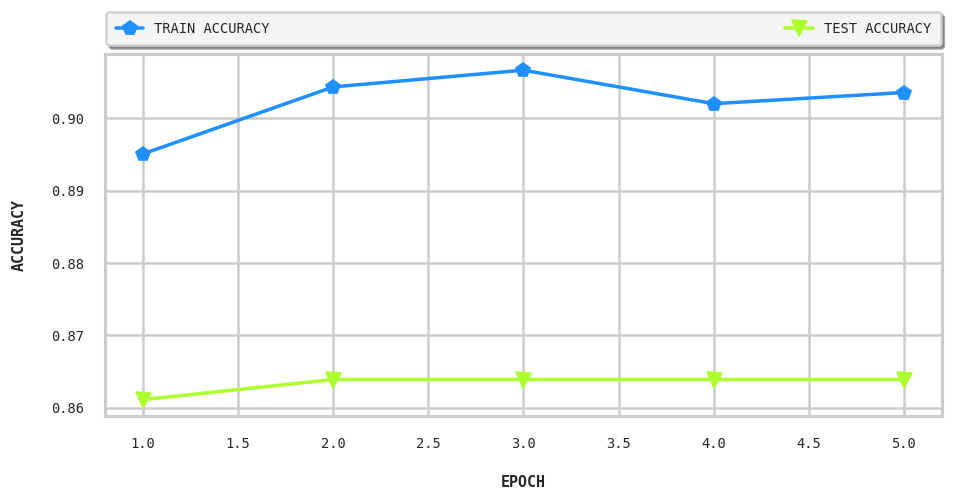


LOSS VALUES


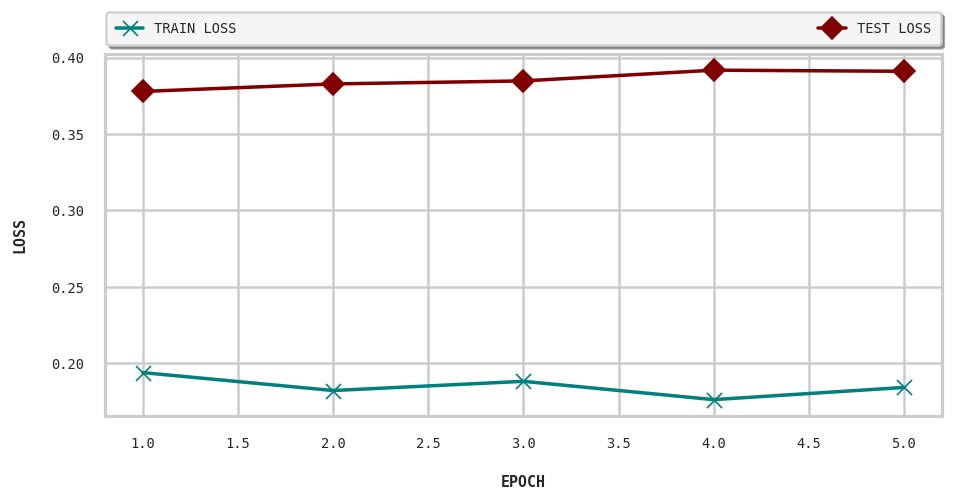


AT LEARNING RATE 0.01
______________________________

Epoch 1/20
72/72 [==============================] - ETA: 0s - loss: 0.2133 - accuracy: 0.8866
Epoch 00001: val_loss improved from inf to 0.43046, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_mometum_nestrov0.01.h5
72/72 [==============================] - 47s 655ms/step - loss: 0.2133 - accuracy: 0.8866 - val_loss: 0.4305 - val_accuracy: 0.8417 - lr: 0.0100
Epoch 2/20
72/72 [==============================] - ETA: 0s - loss: 0.2148 - accuracy: 0.8873
Epoch 00002: val_loss improved from 0.43046 to 0.39887, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_mometum_nestrov0.01.h5
72/72 [==============================] - 46s 642ms/step - loss: 0.2148 - accuracy: 0.8873 - val_loss: 0.3989 - val_accuracy: 0.8528 - lr: 0.0100
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 0.2073 - accuracy: 0.9020
Epoch 00003: val_loss improved from 0.39887 to 0.38845, saving model to C:\Users\mishr\

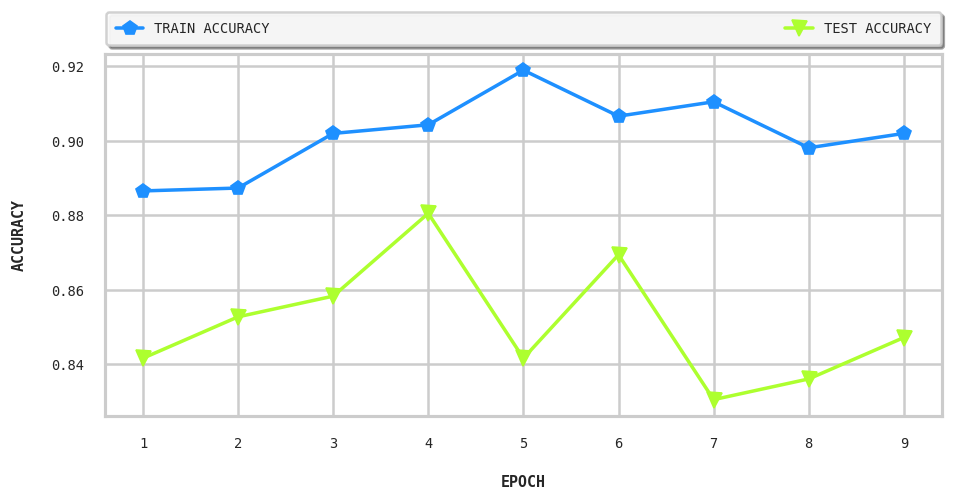


LOSS VALUES


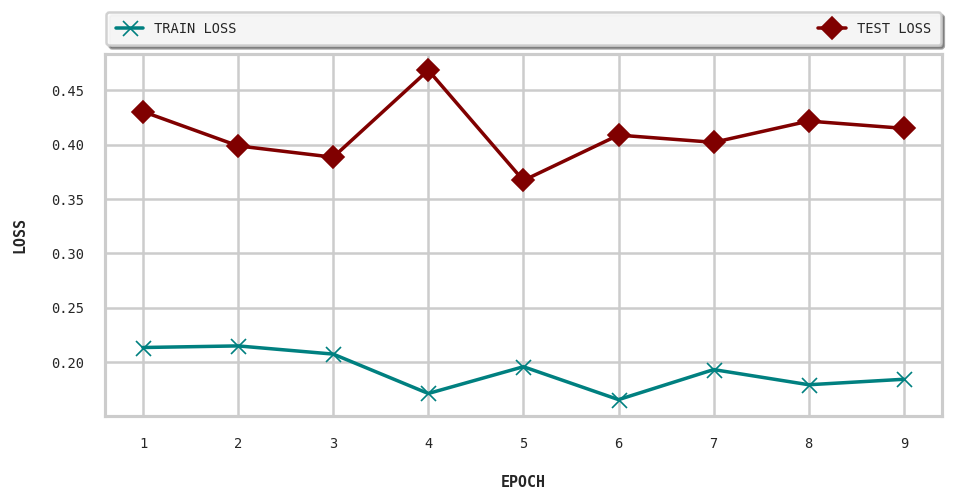


AT LEARNING RATE 0.025
______________________________

Epoch 1/20
72/72 [==============================] - ETA: 0s - loss: 0.2050 - accuracy: 0.8981
Epoch 00001: val_loss improved from inf to 0.40317, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_mometum_nestrov0.025.h5
72/72 [==============================] - 45s 620ms/step - loss: 0.2050 - accuracy: 0.8981 - val_loss: 0.4032 - val_accuracy: 0.8500 - lr: 0.0250
Epoch 2/20
72/72 [==============================] - ETA: 0s - loss: 0.2292 - accuracy: 0.8850
Epoch 00002: val_loss did not improve from 0.40317
72/72 [==============================] - 45s 620ms/step - loss: 0.2292 - accuracy: 0.8850 - val_loss: 0.4763 - val_accuracy: 0.8278 - lr: 0.0250
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 0.2741 - accuracy: 0.8850
Epoch 00003: val_loss did not improve from 0.40317
72/72 [==============================] - 45s 625ms/step - loss: 0.2741 - accuracy: 0.8850 - val_loss: 0.5796 - val_accuracy: 0.7

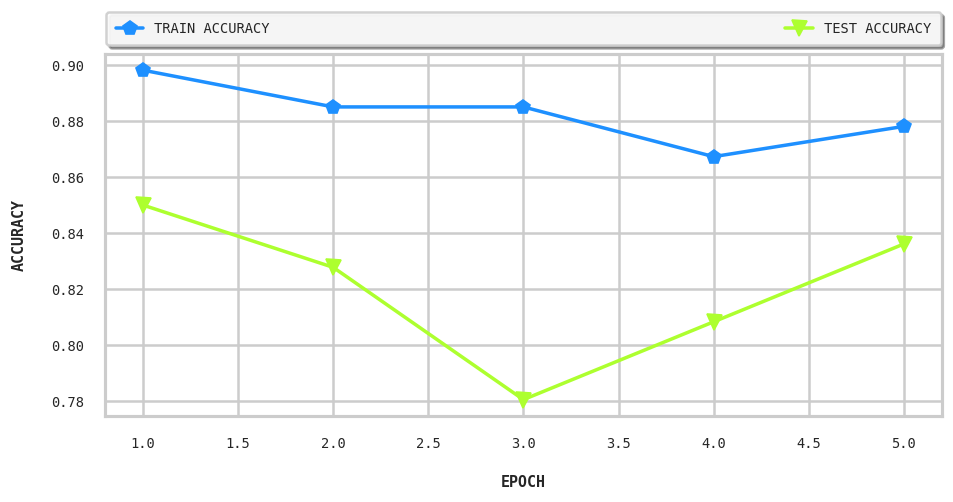


LOSS VALUES


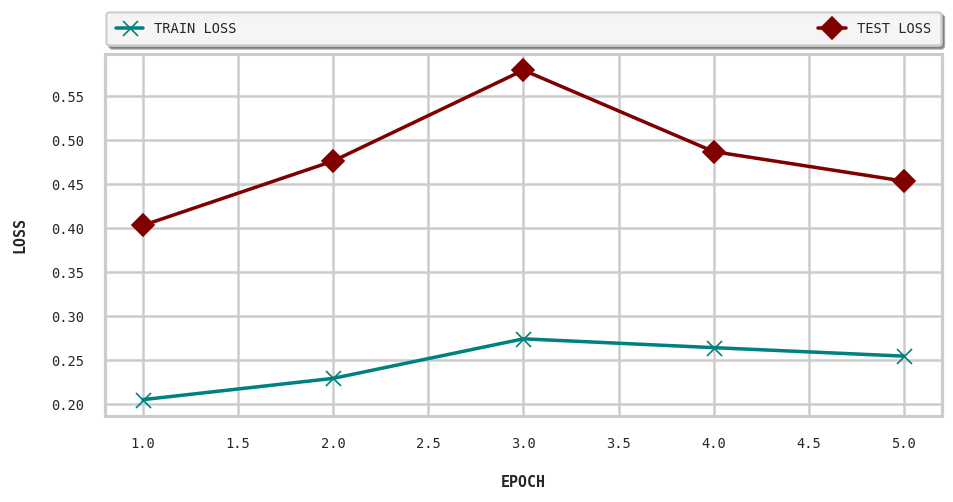

In [14]:
lr=(0.001,0.01,0.025)
for i in (lr):
    print("AT LEARNING RATE",i)
    print("__"*15)
    print()     
    opt = SGD(learning_rate=i, momentum=0.9,nesterov=True)
    m.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    
#defining the callbacks    
    check= MCP(r"C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_mometum_nestrov"+str(i)+".h5",
          monitor='val_loss', verbose=1,save_best_only=True,save_weights_only=False, mode='min')

    early=ESP(monitor='val_loss', min_delta=0, patience=4, verbose=1, mode='min',baseline=None, restore_best_weights=True)

    rlp=RLP(monitor='val_loss',factor=0.1, patience=3, verbose=1, mode='min',min_delta=0)


    cb=[early,check,rlp]
    
#training the dataset
    sgd_momt_nest = m.fit(x_train,y_train,batch_size =18,epochs=20,steps_per_epoch=np.floor(len(x_train)//20),
                     validation_data = (x_test, y_test),callbacks=cb)

#predicting the results for test dataset
    print("\npredicting the model performance wrt test dataset")
    prediction= m.evaluate(x_test, y_test)
    prediction 
    print("\nPrediction_TEST LOSS:\t",prediction[0]*100)
    print("\nPrediction_TEST ACCURACY:\t",prediction[1]*100)
    print()
    
    #visualization
   
       
    
#visualization
   
    record= sgd_momt_nest.history
    loss=record['loss']
    acc=record['accuracy']
    valid_loss=record['val_loss']
    val_acu=record['val_accuracy']
    epoch=range(1,len(loss)+1)
    
    #PLOTTING ACCURACY VALUES
    print('Accuracy Value')
    plt.figure(figsize=(9,4),dpi=120)
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.5)
    l1=plt.plot(epoch,acc,label="TRAIN ACCURACY")
    l2=plt.plot(epoch,val_acu,label="TEST ACCURACY")

    plt.setp(l1,color='dodgerblue',marker="p",linewidth=2.1)
    plt.setp(l2,color='greenyellow',marker="v",linewidth=2.1)

    plt.xlabel('\nEPOCH',weight='bold')
    plt.ylabel('ACCURACY\n',weight='bold')
    plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1)
    
    plt.show()
    
    
#PLOTTING LOSS VALUES
    print("\nLOSS VALUES")
    plt.figure(figsize=(9,4),dpi=120)
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.5)
    l1=plt.plot(epoch,loss,label="TRAIN LOSS")
    l2=plt.plot(epoch,valid_loss,label="TEST LOSS")

    plt.setp(l1,color='teal',marker="x",linewidth=2.1)
    plt.setp(l2,color='maroon',marker="D",linewidth=2.1)

    plt.xlabel('\nEPOCH',weight='bold')
    plt.ylabel('LOSS\n',weight='bold')
    plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1)
    
    plt.show()
    
    print()

**compiling the model with RMSPROP with callbacks**

AT LEARNING RATE 0.001
______________________________

Epoch 1/20
72/72 [==============================] - ETA: 0s - loss: 0.1796 - accuracy: 0.9136
Epoch 00001: val_loss improved from inf to 0.51722, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_RMSPROP0.001.h5
72/72 [==============================] - 46s 635ms/step - loss: 0.1796 - accuracy: 0.9136 - val_loss: 0.5172 - val_accuracy: 0.8639 - lr: 0.0010
Epoch 2/20
72/72 [==============================] - ETA: 0s - loss: 0.1758 - accuracy: 0.9136
Epoch 00002: val_loss did not improve from 0.51722
72/72 [==============================] - 43s 597ms/step - loss: 0.1758 - accuracy: 0.9136 - val_loss: 0.5455 - val_accuracy: 0.8639 - lr: 0.0010
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 0.1646 - accuracy: 0.9144
Epoch 00003: val_loss did not improve from 0.51722
72/72 [==============================] - 43s 595ms/step - loss: 0.1646 - accuracy: 0.9144 - val_loss: 0.5485 - val_accuracy: 0.8583 - lr: 0.0

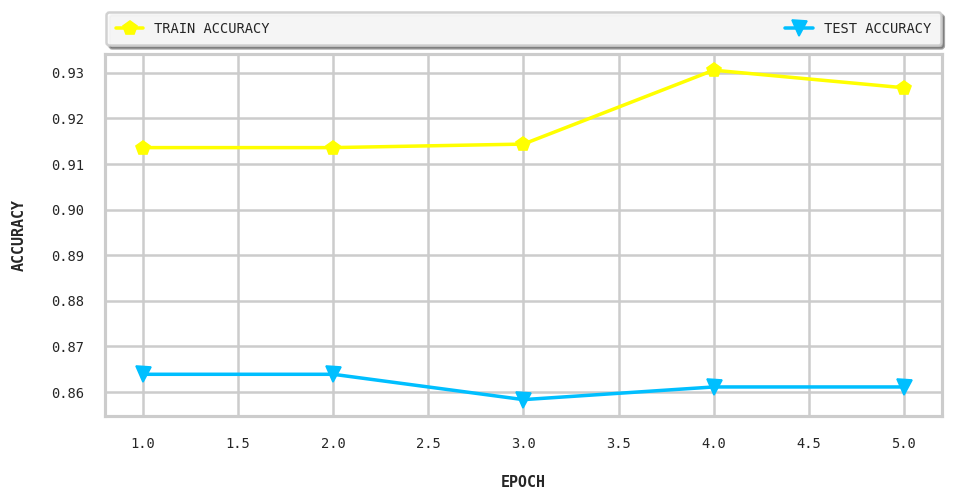


LOSS VALUES


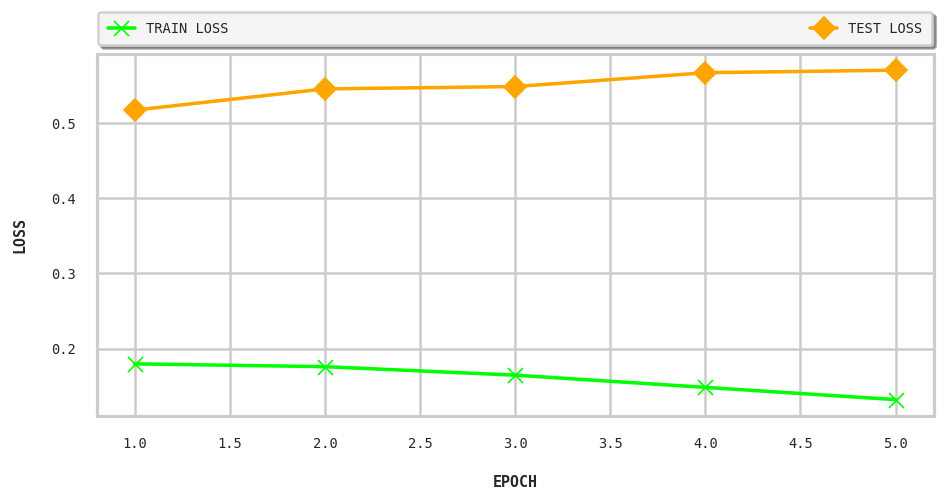


AT LEARNING RATE 0.01
______________________________

Epoch 1/20
72/72 [==============================] - ETA: 0s - loss: 1.7026 - accuracy: 0.7724
Epoch 00001: val_loss improved from inf to 0.50750, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_RMSPROP0.01.h5
72/72 [==============================] - 43s 597ms/step - loss: 1.7026 - accuracy: 0.7724 - val_loss: 0.5075 - val_accuracy: 0.7972 - lr: 0.0100
Epoch 2/20
72/72 [==============================] - ETA: 0s - loss: 0.4538 - accuracy: 0.8634
Epoch 00002: val_loss improved from 0.50750 to 0.35647, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_RMSPROP0.01.h5
72/72 [==============================] - 46s 637ms/step - loss: 0.4538 - accuracy: 0.8634 - val_loss: 0.3565 - val_accuracy: 0.8667 - lr: 0.0100
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 0.3243 - accuracy: 0.8812
Epoch 00003: val_loss did not improve from 0.35647
72/72 [==============================] - 43s 593ms/step - lo

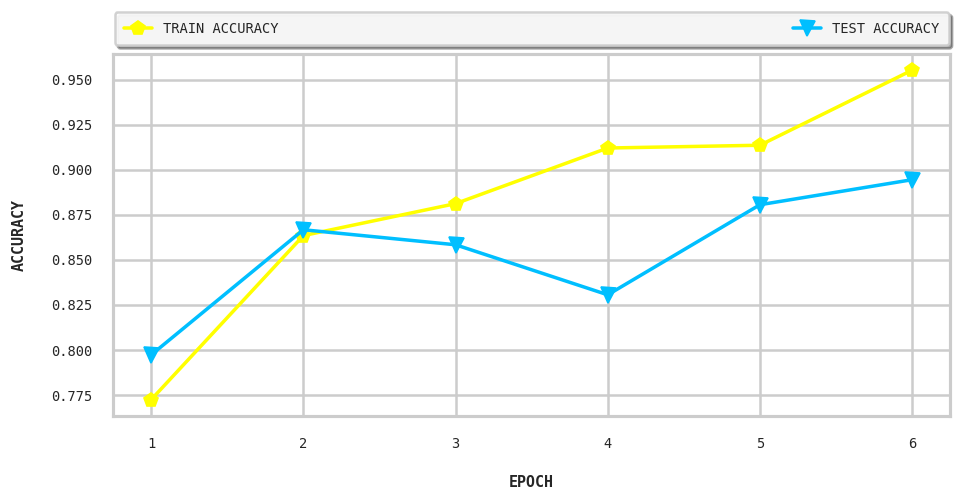


LOSS VALUES


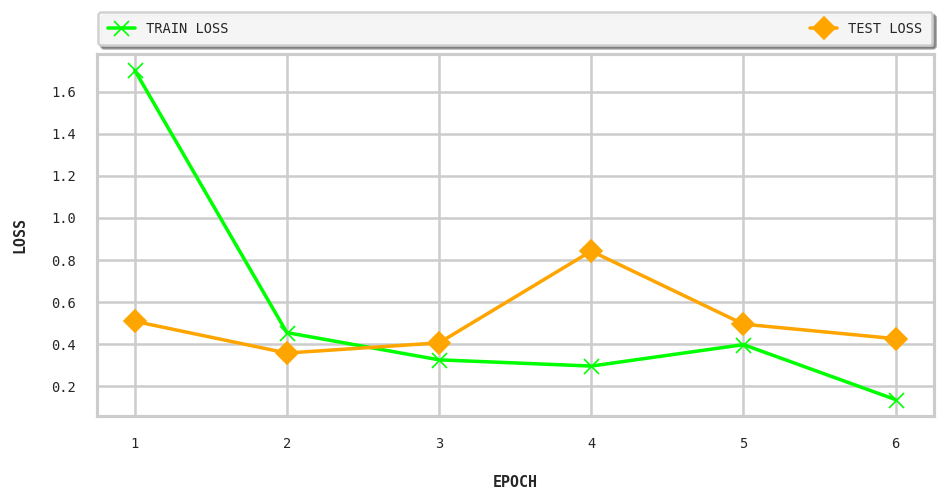


AT LEARNING RATE 0.025
______________________________

Epoch 1/20
72/72 [==============================] - ETA: 0s - loss: 7.1178 - accuracy: 0.5224
Epoch 00001: val_loss improved from inf to 0.72225, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_RMSPROP0.025.h5
72/72 [==============================] - 44s 610ms/step - loss: 7.1178 - accuracy: 0.5224 - val_loss: 0.7222 - val_accuracy: 0.7000 - lr: 0.0250
Epoch 2/20
72/72 [==============================] - ETA: 0s - loss: 1.8036 - accuracy: 0.6042
Epoch 00002: val_loss did not improve from 0.72225
72/72 [==============================] - 43s 592ms/step - loss: 1.8036 - accuracy: 0.6042 - val_loss: 0.8945 - val_accuracy: 0.5528 - lr: 0.0250
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 1.1428 - accuracy: 0.5833
Epoch 00003: val_loss did not improve from 0.72225
72/72 [==============================] - 43s 591ms/step - loss: 1.1428 - accuracy: 0.5833 - val_loss: 0.7223 - val_accuracy: 0.5944 - lr: 0.

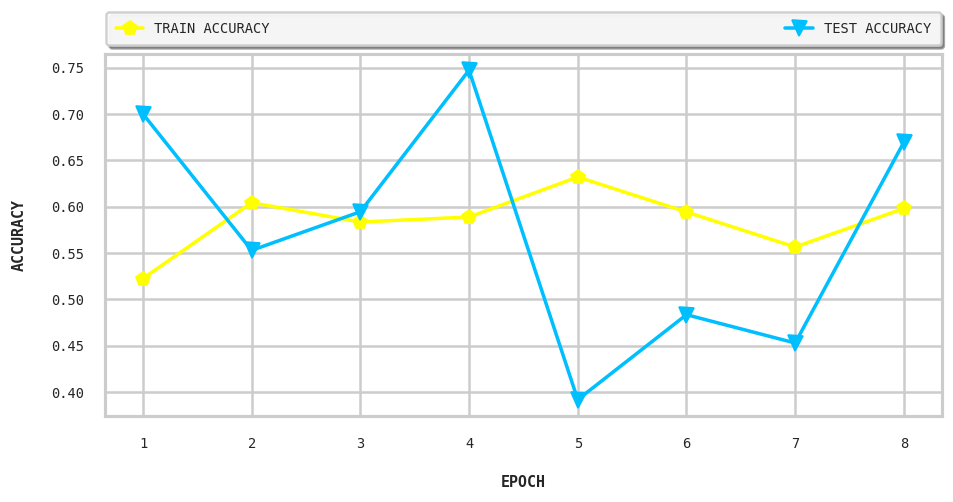


LOSS VALUES


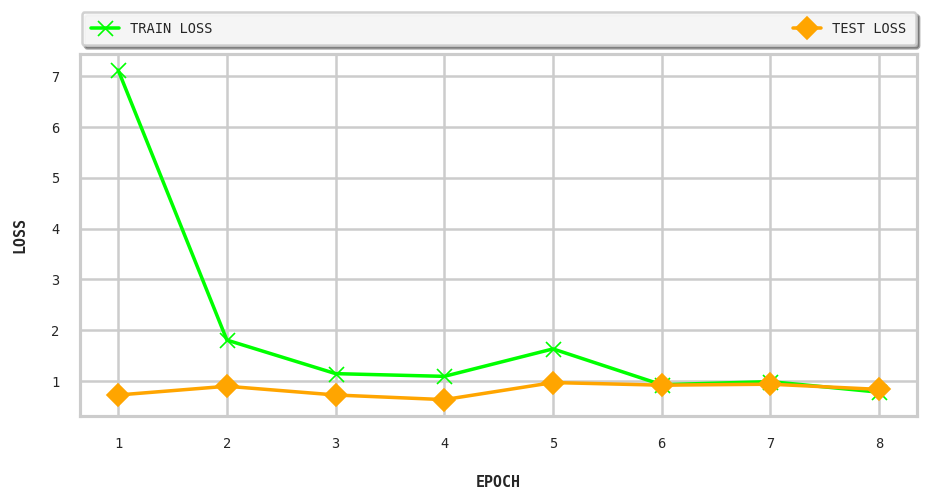

In [15]:
lr=(0.001,0.01,0.025)
for i in (lr):
    print("AT LEARNING RATE",i)
    print("__"*15)
    print()     
    opt = RMSprop(learning_rate=i)
    m.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    
#defining the callbacks    
    check= MCP(r"C:\Users\mishr\CNN\p4_saved_model\garment_MCP_RMSPROP"+str(i)+".h5",
          monitor='val_loss', verbose=1,save_best_only=True,save_weights_only=False, mode='min')

    early=ESP(monitor='val_loss', min_delta=0, patience=4, verbose=1, mode='min',baseline=None, restore_best_weights=True)

    rlp=RLP(monitor='val_loss',factor=0.1, patience=3, verbose=1, mode='min',min_delta=0)


    cb=[early,check,rlp]
    
#training the dataset
    rmsprp = m.fit(x_train,y_train,batch_size =18,epochs=20,steps_per_epoch=np.floor(len(x_train)//20),
                     validation_data = (x_test, y_test),callbacks=cb)

#predicting the results for test dataset
    print("\npredicting the model performance wrt test dataset")
    prediction= m.evaluate(x_test, y_test)
    prediction 
    print("\nPrediction_TEST LOSS:\t",prediction[0]*100)
    print("\nPrediction_TEST ACCURACY:\t",prediction[1]*100)
    print()
   
    
#visualization
   
    record= rmsprp.history
    loss=record['loss']
    acc=record['accuracy']
    valid_loss=record['val_loss']
    val_acu=record['val_accuracy']
    epoch=range(1,len(loss)+1)
    
    #PLOTTING ACCURACY VALUES
    print('Accuracy Value')
    plt.figure(figsize=(9,4),dpi=120)
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.5)
    l1=plt.plot(epoch,acc,label="TRAIN ACCURACY")
    l2=plt.plot(epoch,val_acu,label="TEST ACCURACY")

    plt.setp(l1,color='yellow',marker="p",linewidth=2.1)
    plt.setp(l2,color='deepskyblue',marker="v",linewidth=2.1)

    plt.xlabel('\nEPOCH',weight='bold')
    plt.ylabel('ACCURACY\n',weight='bold')
    plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1)
    
    plt.show()
    
    
#PLOTTING LOSS VALUES
    print("\nLOSS VALUES")
    plt.figure(figsize=(9,4),dpi=120)
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.5)
    l1=plt.plot(epoch,loss,label="TRAIN LOSS")
    l2=plt.plot(epoch,valid_loss,label="TEST LOSS")

    plt.setp(l1,color='lime',marker="x",linewidth=2.1)
    plt.setp(l2,color='orange',marker="D",linewidth=2.1)

    plt.xlabel('\nEPOCH',weight='bold')
    plt.ylabel('LOSS\n',weight='bold')
    plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1)
    
    plt.show()
    
    print()

**compiling the model with ADAM  with callbacks**

AT LEARNING RATE 0.001
______________________________

Epoch 1/20
72/72 [==============================] - ETA: 0s - loss: 0.7325 - accuracy: 0.7160
Epoch 00001: val_loss improved from inf to 0.58249, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_ADAM0.001.h5
72/72 [==============================] - 43s 592ms/step - loss: 0.7325 - accuracy: 0.7160 - val_loss: 0.5825 - val_accuracy: 0.7389 - lr: 0.0010
Epoch 2/20
72/72 [==============================] - ETA: 0s - loss: 0.6014 - accuracy: 0.7145
Epoch 00002: val_loss did not improve from 0.58249
72/72 [==============================] - 42s 581ms/step - loss: 0.6014 - accuracy: 0.7145 - val_loss: 0.5852 - val_accuracy: 0.7417 - lr: 0.0010
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 0.5600 - accuracy: 0.7353
Epoch 00003: val_loss improved from 0.58249 to 0.54081, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_ADAM0.001.h5
72/72 [==============================] - 42s 585ms/step - loss: 

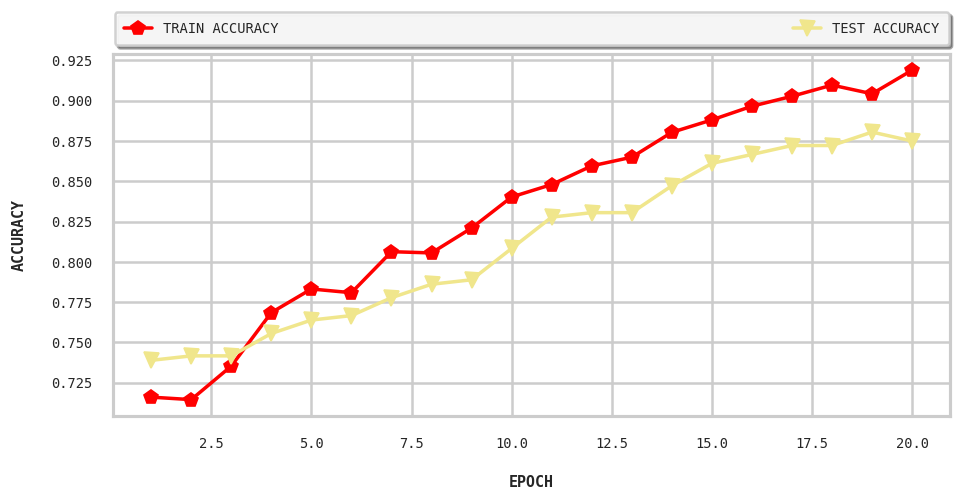


LOSS VALUES


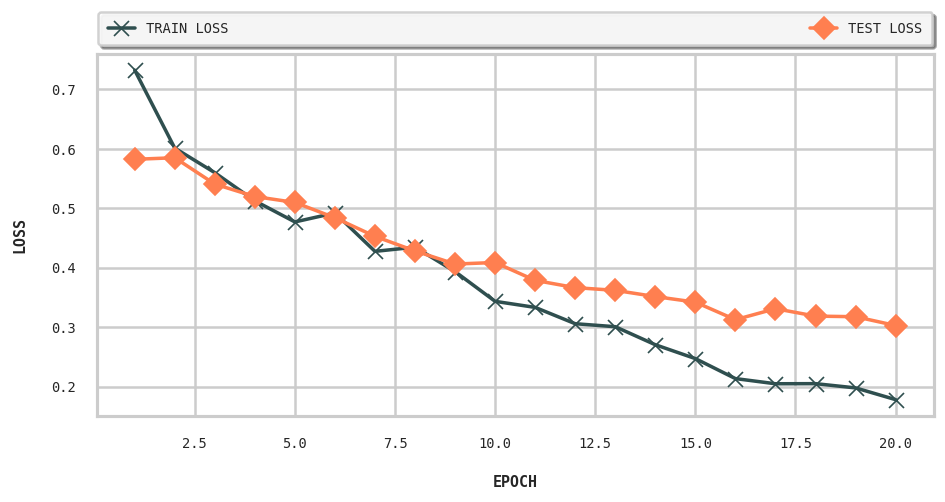


AT LEARNING RATE 0.01
______________________________

Epoch 1/20
72/72 [==============================] - ETA: 0s - loss: 0.5931 - accuracy: 0.8048
Epoch 00001: val_loss improved from inf to 0.56275, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_ADAM0.01.h5
72/72 [==============================] - 43s 604ms/step - loss: 0.5931 - accuracy: 0.8048 - val_loss: 0.5628 - val_accuracy: 0.7917 - lr: 0.0100
Epoch 2/20
72/72 [==============================] - ETA: 0s - loss: 0.4287 - accuracy: 0.8403
Epoch 00002: val_loss improved from 0.56275 to 0.45352, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_ADAM0.01.h5
72/72 [==============================] - 43s 602ms/step - loss: 0.4287 - accuracy: 0.8403 - val_loss: 0.4535 - val_accuracy: 0.8167 - lr: 0.0100
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 0.4407 - accuracy: 0.8210
Epoch 00003: val_loss improved from 0.45352 to 0.34218, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP

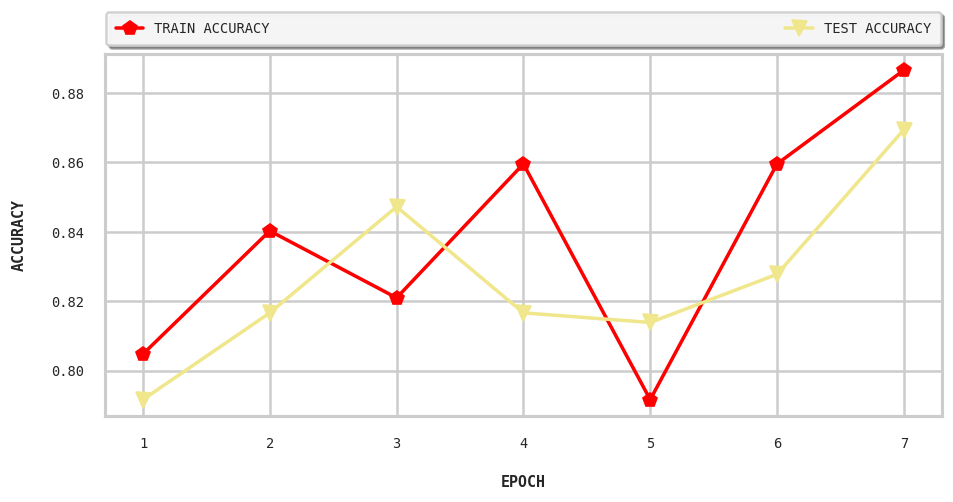


LOSS VALUES


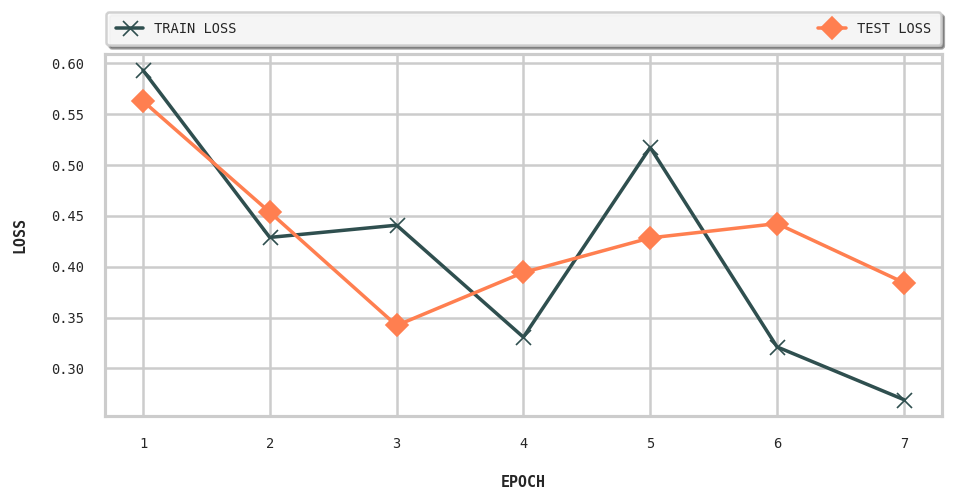


AT LEARNING RATE 0.025
______________________________

Epoch 1/20
72/72 [==============================] - ETA: 0s - loss: 0.9881 - accuracy: 0.6227
Epoch 00001: val_loss improved from inf to 0.87278, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_ADAM0.025.h5
72/72 [==============================] - 44s 606ms/step - loss: 0.9881 - accuracy: 0.6227 - val_loss: 0.8728 - val_accuracy: 0.5278 - lr: 0.0250
Epoch 2/20
72/72 [==============================] - ETA: 0s - loss: 1.0805 - accuracy: 0.4938
Epoch 00002: val_loss did not improve from 0.87278
72/72 [==============================] - 44s 605ms/step - loss: 1.0805 - accuracy: 0.4938 - val_loss: 0.9519 - val_accuracy: 0.4222 - lr: 0.0250
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 0.9818 - accuracy: 0.5131
Epoch 00003: val_loss did not improve from 0.87278
72/72 [==============================] - 43s 601ms/step - loss: 0.9818 - accuracy: 0.5131 - val_loss: 1.0832 - val_accuracy: 0.3389 - lr: 0.025

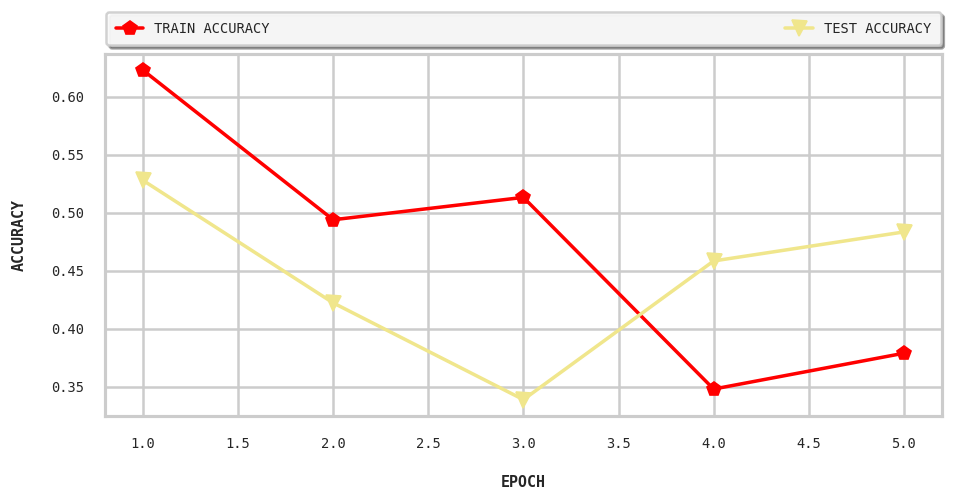


LOSS VALUES


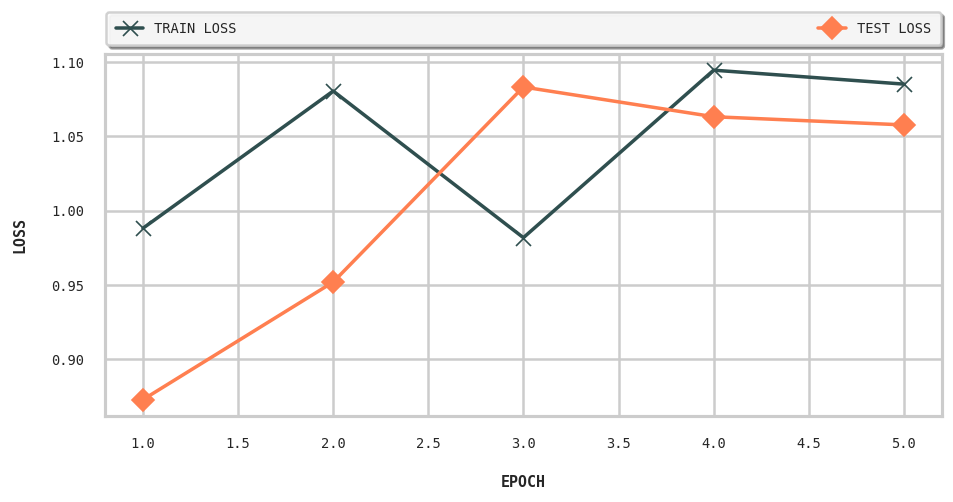

In [16]:
lr=(0.001,0.01,0.025)
for i in (lr):
    print("AT LEARNING RATE",i)
    print("__"*15)
    print()     
    opt = Adam(learning_rate=i)
    m.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    
#defining the callbacks    
    check= MCP(r"C:\Users\mishr\CNN\p4_saved_model\garment_MCP_ADAM"+str(i)+".h5",
          monitor='val_loss', verbose=1,save_best_only=True,save_weights_only=False, mode='min')

    early=ESP(monitor='val_loss', min_delta=0, patience=4, verbose=1, mode='min',baseline=None, restore_best_weights=True)

    rlp=RLP(monitor='val_loss',factor=0.1, patience=3, verbose=1, mode='min',min_delta=0)


    cb=[early,check,rlp]
    
#training the dataset
    adam = m.fit(x_train,y_train,batch_size =18,epochs=20,steps_per_epoch=np.floor(len(x_train)//20),
                     validation_data = (x_test, y_test),callbacks=cb)

#predicting the results for test dataset
    print("\npredicting the model performance wrt test dataset")
    prediction= m.evaluate(x_test, y_test)
    prediction 
    print("\nPrediction_TEST LOSS:\t",prediction[0]*100)
    print("\nPrediction_TEST ACCURACY:\t",prediction[1]*100)
    print()
       
    
#visualization
   
    record= adam.history
    loss=record['loss']
    acc=record['accuracy']
    valid_loss=record['val_loss']
    val_acu=record['val_accuracy']
    epoch=range(1,len(loss)+1)
    
    #PLOTTING ACCURACY VALUES
    print('Accuracy Value')
    plt.figure(figsize=(9,4),dpi=120)
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.5)
    l1=plt.plot(epoch,acc,label="TRAIN ACCURACY")
    l2=plt.plot(epoch,val_acu,label="TEST ACCURACY")

    plt.setp(l1,color='red',marker="p",linewidth=2.1)
    plt.setp(l2,color='khaki',marker="v",linewidth=2.1)

    plt.xlabel('\nEPOCH',weight='bold')
    plt.ylabel('ACCURACY\n',weight='bold')
    plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1)
    
    plt.show()
    
    
#PLOTTING LOSS VALUES
    print("\nLOSS VALUES")
    plt.figure(figsize=(9,4),dpi=120)
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.5)
    l1=plt.plot(epoch,loss,label="TRAIN LOSS")
    l2=plt.plot(epoch,valid_loss,label="TEST LOSS")

    plt.setp(l1,color='darkslategrey',marker="x",linewidth=2.1)
    plt.setp(l2,color='coral',marker="D",linewidth=2.1)

    plt.xlabel('\nEPOCH',weight='bold')
    plt.ylabel('LOSS\n',weight='bold')
    plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1)
    
    plt.show()
    
    print()

**compiling the model with NADAM with callbacks**

AT LEARNING RATE 0.001
______________________________

Epoch 1/20
72/72 [==============================] - ETA: 0s - loss: 0.8820 - accuracy: 0.6304
Epoch 00001: val_loss improved from inf to 0.82677, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_nadam0.001.h5
72/72 [==============================] - 44s 617ms/step - loss: 0.8820 - accuracy: 0.6304 - val_loss: 0.8268 - val_accuracy: 0.5694 - lr: 0.0010
Epoch 2/20
72/72 [==============================] - ETA: 0s - loss: 0.7049 - accuracy: 0.6898
Epoch 00002: val_loss improved from 0.82677 to 0.75251, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_nadam0.001.h5
72/72 [==============================] - 44s 618ms/step - loss: 0.7049 - accuracy: 0.6898 - val_loss: 0.7525 - val_accuracy: 0.6167 - lr: 0.0010
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 0.6807 - accuracy: 0.7099
Epoch 00003: val_loss improved from 0.75251 to 0.67995, saving model to C:\Users\mishr\CNN\p4_saved_model\garment

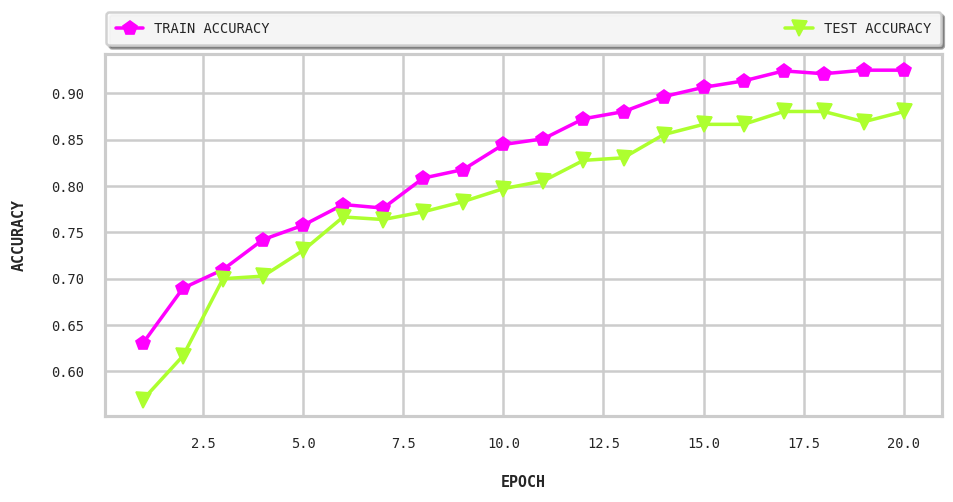


LOSS VALUES


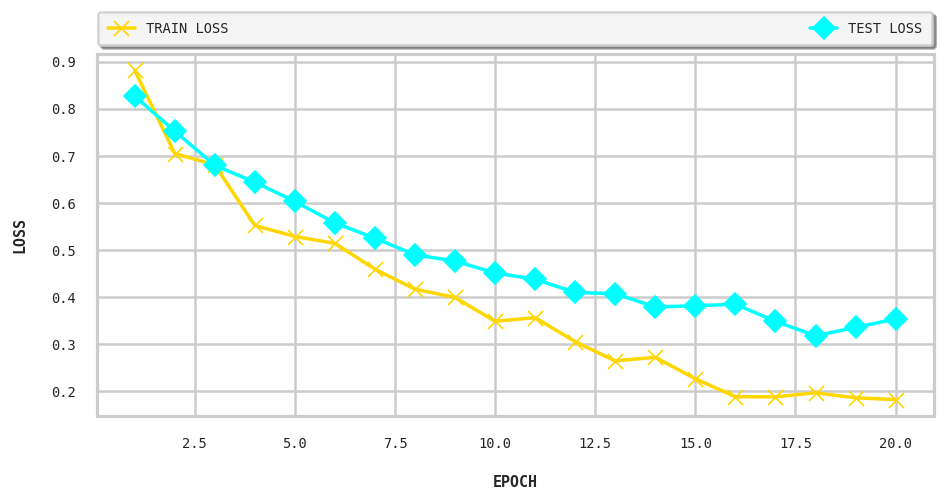


AT LEARNING RATE 0.01
______________________________

Epoch 1/20
72/72 [==============================] - ETA: 0s - loss: 0.4676 - accuracy: 0.8488
Epoch 00001: val_loss improved from inf to 0.41826, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_nadam0.01.h5
72/72 [==============================] - 45s 619ms/step - loss: 0.4676 - accuracy: 0.8488 - val_loss: 0.4183 - val_accuracy: 0.8194 - lr: 0.0100
Epoch 2/20
72/72 [==============================] - ETA: 0s - loss: 0.4161 - accuracy: 0.8534
Epoch 00002: val_loss improved from 0.41826 to 0.39308, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_nadam0.01.h5
72/72 [==============================] - 46s 633ms/step - loss: 0.4161 - accuracy: 0.8534 - val_loss: 0.3931 - val_accuracy: 0.8389 - lr: 0.0100
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 0.4888 - accuracy: 0.8318
Epoch 00003: val_loss did not improve from 0.39308
72/72 [==============================] - 45s 624ms/step - loss: 

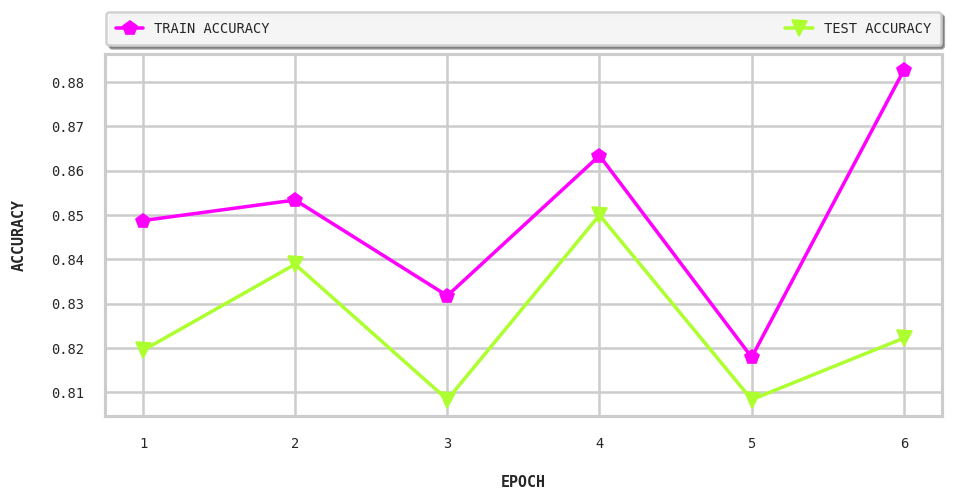


LOSS VALUES


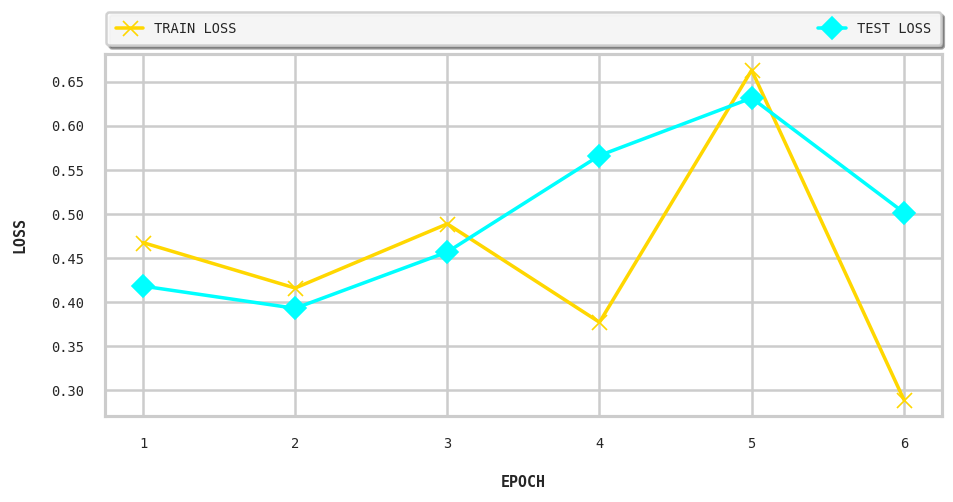


AT LEARNING RATE 0.025
______________________________

Epoch 1/20
72/72 [==============================] - ETA: 0s - loss: 1.4225 - accuracy: 0.5910
Epoch 00001: val_loss improved from inf to 0.90264, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_nadam0.025.h5
72/72 [==============================] - 46s 633ms/step - loss: 1.4225 - accuracy: 0.5910 - val_loss: 0.9026 - val_accuracy: 0.5583 - lr: 0.0250
Epoch 2/20
72/72 [==============================] - ETA: 0s - loss: 0.9364 - accuracy: 0.5162
Epoch 00002: val_loss improved from 0.90264 to 0.86866, saving model to C:\Users\mishr\CNN\p4_saved_model\garment_MCP_nadam0.025.h5
72/72 [==============================] - 45s 623ms/step - loss: 0.9364 - accuracy: 0.5162 - val_loss: 0.8687 - val_accuracy: 0.4889 - lr: 0.0250
Epoch 3/20
72/72 [==============================] - ETA: 0s - loss: 1.3360 - accuracy: 0.3588
Epoch 00003: val_loss did not improve from 0.86866
72/72 [==============================] - 45s 624ms/step - los

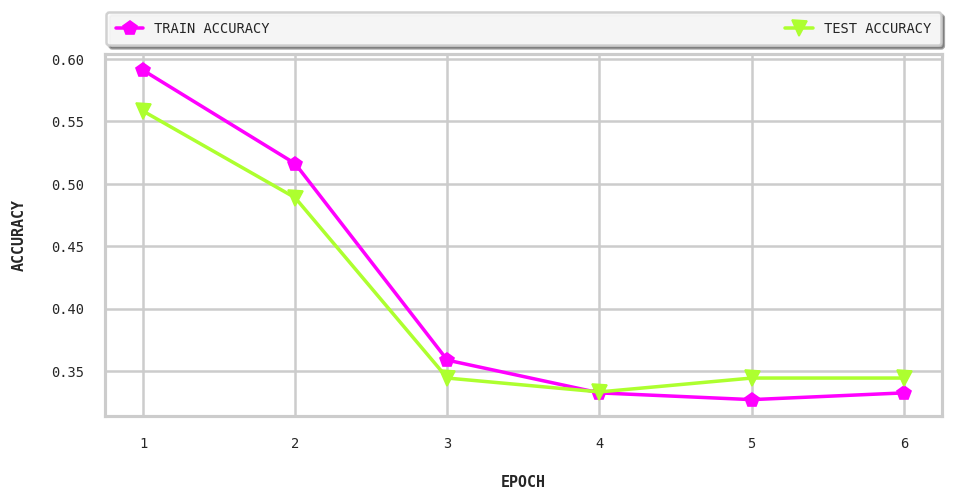


LOSS VALUES


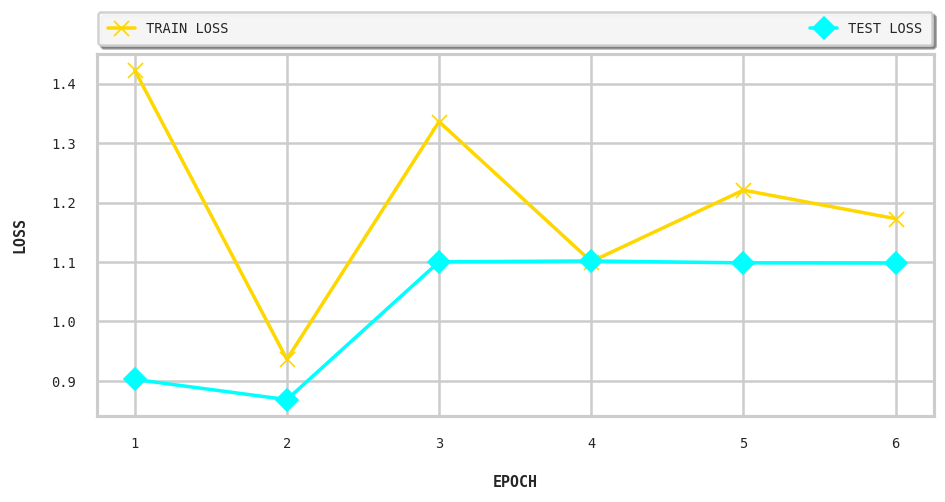

In [17]:
lr=(0.001,0.01,0.025)
for i in (lr):
    print("AT LEARNING RATE",i)
    print("__"*15)
    print()     
    opt = Nadam(learning_rate=i)
    m.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    
#defining the callbacks    
    check= MCP(r"C:\Users\mishr\CNN\p4_saved_model\garment_MCP_nadam"+str(i)+".h5",
          monitor='val_loss', verbose=1,save_best_only=True,save_weights_only=False, mode='min')

    early=ESP(monitor='val_loss', min_delta=0, patience=4, verbose=1, mode='min',baseline=None, restore_best_weights=True)

    rlp=RLP(monitor='val_loss',factor=0.1, patience=3, verbose=1, mode='min',min_delta=0)


    cb=[early,check,rlp]
    
#training the dataset
    nadam = m.fit(x_train,y_train,batch_size =18,epochs=20,steps_per_epoch=np.floor(len(x_train)//20),
                     validation_data = (x_test, y_test),callbacks=cb)

#predicting the results for test dataset
    print("\npredicting the model performance wrt test dataset")
    prediction= m.evaluate(x_test, y_test)
    prediction 
    print("\nPrediction_TEST LOSS:\t",prediction[0]*100)
    print("\nPrediction_TEST ACCURACY:\t",prediction[1]*100)
    print()
    
    
    
   
    
#visualization
   
    record= nadam.history
    loss=record['loss']
    acc=record['accuracy']
    valid_loss=record['val_loss']
    val_acu=record['val_accuracy']
    epoch=range(1,len(loss)+1)
    
    #PLOTTING ACCURACY VALUES
    print('Accuracy Value')
    plt.figure(figsize=(9,4),dpi=120)
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.5)
    l1=plt.plot(epoch,acc,label="TRAIN ACCURACY")
    l2=plt.plot(epoch,val_acu,label="TEST ACCURACY")

    plt.setp(l1,color='fuchsia',marker="p",linewidth=2.1)
    plt.setp(l2,color='greenyellow',marker="v",linewidth=2.1)

    plt.xlabel('\nEPOCH',weight='bold')
    plt.ylabel('ACCURACY\n',weight='bold')
    plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1)
    
    plt.show()
    
    
#PLOTTING LOSS VALUES
    print("\nLOSS VALUES")
    plt.figure(figsize=(9,4),dpi=120)
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.5)
    l1=plt.plot(epoch,loss,label="TRAIN LOSS")
    l2=plt.plot(epoch,valid_loss,label="TEST LOSS")

    plt.setp(l1,color='gold',marker="x",linewidth=2.1)
    plt.setp(l2,color='cyan',marker="D",linewidth=2.1)

    plt.xlabel('\nEPOCH',weight='bold')
    plt.ylabel('LOSS\n',weight='bold')
    plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1)
    
    plt.show()
    
    print()
    

# TESTING THE MODELS

**loading SGD_MOMT model with 0.001 LR**

In [23]:
from keras.models import load_model

SGD_MO=load_model(r"C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_momt0.001.h5")

In [26]:
testing = x_test[200:201]
print (testing.shape)

(1, 128, 128, 1)


In [29]:
print(SGD_MO.predict(testing))

[[9.9993825e-01 2.8350876e-05 3.3339362e-05]]


In [28]:
np.argmax(SGD_MO.predict(testing), axis=-1)

array([0], dtype=int64)

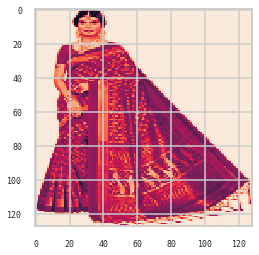

In [31]:
#the class zero belongs to saree, visualizing the image
im200th = testing.reshape((128,128))
plt.imshow(im200th)
plt.show()

Shape of test image (128, 128)


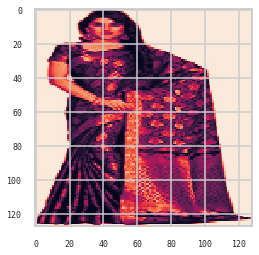

In [32]:
#doing prediction on an unseen image
test1 = cv2.imread(r"C:\Users\mishr\CNN\AUGUMENTED\test_folder\imgsaree_621.jpeg")
test1=cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)
test1=cv2.resize(test1,(128,128))
test1 = np.array(test1)
test1 = test1.astype('float32')
test1 =test1/255
print ("Shape of test image",test1.shape)

plt.imshow(test1)
plt.show()

In [33]:
#here the shape is (128,128) so iam defining the no of channel and sample so that it can be processed properly
if channel==1:
    if K.image_data_format()==("channels_first"):
        test_img= np.expand_dims(test1, axis=0)
        test_img= np.expand_dims(test1, axis=0)
        print (test_img.shape)
        print("\nTheano ordering has been used /n")
        print (test_img.shape)
    else:
        test_img= np.expand_dims(test1,axis=2) 
        test_img= np.expand_dims(test_img,axis=0)
        print("Tensorflow ordering has been used")
        print (test_img.shape)
else:
    if K.image_data_format()==("channels_first"):
        test_img=np.rollaxis(test1,2,0)  # here roll axis is for bringing the 3rd axis to 1st axis 
        print (img_data.shape)
    else:
        test_img= np.expand_dims(test1, axis=0)
        print (test_image.shape)

Tensorflow ordering has been used
(1, 128, 128, 1)


In [34]:
#predicting the class
print(SGD_MO.predict(test_img))
print("CLASS:", SGD_MO.predict_classes(test_img))

[[9.9999821e-01 3.7943013e-07 1.4491087e-06]]
CLASS: [0]


It can be seen the model predicted correctly

**loading SGD_MOMT model with 0.01 LR**

In [37]:
SGD_MO=load_model(r"C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_momt0.01.h5")

In [38]:
testing = x_test[100:101]
print (testing.shape)
print(SGD_MO.predict(testing))
np.argmax(SGD_MO.predict(testing), axis=-1)

(1, 128, 128, 1)
[[2.9880361e-05 2.9666783e-02 9.7030336e-01]]


array([2], dtype=int64)

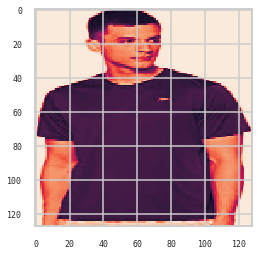

In [39]:
#the class 2 belongs to T_Shirt category, visualizing the image
im100th = testing.reshape((128,128))
plt.imshow(im100th)
plt.show()

Shape of test image (128, 128)


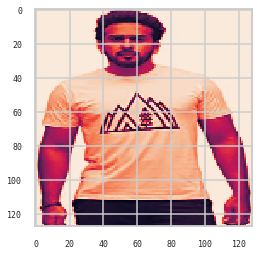

In [40]:
#doing prediction on an unseen image
test2 = cv2.imread(r"C:\Users\mishr\CNN\AUGUMENTED\test_folder\t1.jpg")
test2=cv2.cvtColor(test2, cv2.COLOR_BGR2GRAY)
test2=cv2.resize(test2,(128,128))
test2 = np.array(test2)
test2 = test2.astype('float32')
test2 =test2/255
print ("Shape of test image",test2.shape)

plt.imshow(test2)
plt.show()

In [49]:
#here the shape is (128,128) so iam defining the no of channel and sample so that it can be processed properly
if channel==1:
    if K.image_data_format()==("channels_first"):
        test_img= np.expand_dims(test2, axis=0)
        test_img= np.expand_dims(test2, axis=0)
        print (test_img.shape)
        print("\nTheano ordering has been used /n")
        print (test_img.shape)
    else:
        test_img= np.expand_dims(test2,axis=2) 
        test_img= np.expand_dims(test_img,axis=0)
        print("Tensorflow ordering has been used")
        print (test_img.shape)
else:
    if K.image_data_format()==("channels_first"):
        test_img=np.rollaxis(test2,2,0)  # here roll axis is for bringing the 3rd axis to 1st axis 
        print (img_data.shape)
    else:
        test_img= np.expand_dims(test2, axis=0)
        print (test_image.shape)

Tensorflow ordering has been used
(1, 128, 128, 1)


In [50]:
#predicting the class
print(SGD_MO.predict(test_img))
print("CLASS:", SGD_MO.predict_classes(test_img))

[[0.00096106 0.03834751 0.96069145]]
CLASS: [2]


A CORRECT PREDICTION FOR TSHIRT CLASS

**loading SGD_MOMT model with 0.025 LR**

In [44]:
SGD_MO=load_model(r"C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_momt0.025.h5")

In [45]:
testing = x_test[10:11]
print (testing.shape)
print(SGD_MO.predict(testing))
np.argmax(SGD_MO.predict(testing), axis=-1)

(1, 128, 128, 1)
[[6.4034139e-05 3.7953737e-03 9.9614066e-01]]


array([2], dtype=int64)

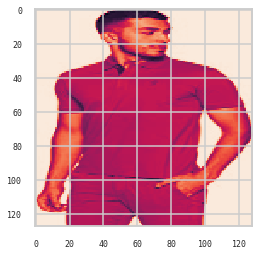

In [46]:
#the class 2 belongs to T_Shirt category, visualizing the image
im10th = testing.reshape((128,128))
plt.imshow(im10th)
plt.show()

Shape of test image (128, 128)


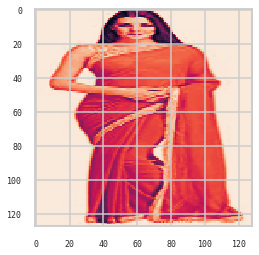

In [47]:
#doing prediction on an unseen image
test3 = cv2.imread(r"C:\Users\mishr\CNN\AUGUMENTED\test_folder\saree1.jpg")
test3=cv2.cvtColor(test3, cv2.COLOR_BGR2GRAY)
test3=cv2.resize(test3,(128,128))
test3 = np.array(test3)
test3 = test3.astype('float32')
test3 =test3/255
print ("Shape of test image",test3.shape)

plt.imshow(test3)
plt.show()

In [51]:
#here the shape is (128,128) so iam defining the no of channel and sample so that it can be processed properly
if channel==1:
    if K.image_data_format()==("channels_first"):
        test_img= np.expand_dims(test3, axis=0)
        test_img= np.expand_dims(test3, axis=0)
        print (test_img.shape)
        print("\nTheano ordering has been used /n")
        print (test_img.shape)
    else:
        test_img= np.expand_dims(test3,axis=2) 
        test_img= np.expand_dims(test_img,axis=0)
        print("Tensorflow ordering has been used")
        print (test_img.shape)
else:
    if K.image_data_format()==("channels_first"):
        test_img=np.rollaxis(test3,2,0)  # here roll axis is for bringing the 3rd axis to 1st axis 
        print (img_data.shape)
    else:
        test_img= np.expand_dims(test3, axis=0)
        print (test_image.shape)

Tensorflow ordering has been used
(1, 128, 128, 1)


In [52]:
#predicting the class
print(SGD_MO.predict(test_img))
print("CLASS:", SGD_MO.predict_classes(test_img))

[[1.0000000e+00 5.0392913e-08 3.2717806e-09]]
CLASS: [0]


A CORRECT PREDICTION

**loading SGD_MOMT_NEST model with 0.001 LR**

In [53]:
SGD_MO_NEST=load_model(r"C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_mometum_nestrov0.001.h5")

In [54]:
testing = x_test[1:2]
print (testing.shape)
print(SGD_MO_NEST.predict(testing))
np.argmax(SGD_MO_NEST.predict(testing), axis=-1)

(1, 128, 128, 1)
[[2.6266880e-05 9.9876046e-01 1.2131867e-03]]


array([1], dtype=int64)

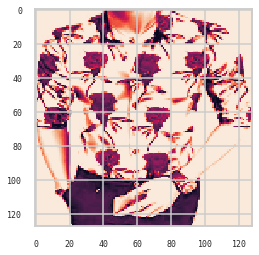

In [55]:
#the class 1 belongs to Shirt category, visualizing the image
im1st = testing.reshape((128,128))
plt.imshow(im1st)
plt.show()

Shape of test image (128, 128)


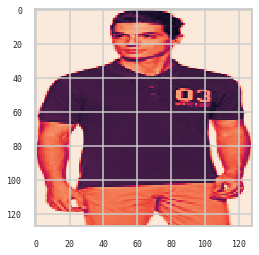

In [56]:
#doing prediction on an unseen image
test4 = cv2.imread(r"C:\Users\mishr\CNN\AUGUMENTED\test_folder\t6.jpg")
test4=cv2.cvtColor(test4, cv2.COLOR_BGR2GRAY)
test4=cv2.resize(test4,(128,128))
test4 = np.array(test4)
test4 = test4.astype('float32')
test4 =test4/255
print ("Shape of test image",test4.shape)

plt.imshow(test4)
plt.show()


In [57]:
#here the shape is (128,128) so iam defining the no of channel and sample so that it can be processed properly
if channel==1:
    if K.image_data_format()==("channels_first"):
        test_img= np.expand_dims(test4, axis=0)
        test_img= np.expand_dims(test4, axis=0)
        print (test_img.shape)
        print("\nTheano ordering has been used /n")
        print (test_img.shape)
    else:
        test_img= np.expand_dims(test4,axis=2) 
        test_img= np.expand_dims(test_img,axis=0)
        print("Tensorflow ordering has been used")
        print (test_img.shape)
else:
    if K.image_data_format()==("channels_first"):
        test_img=np.rollaxis(test4,2,0)  # here roll axis is for bringing the 3rd axis to 1st axis 
        print (img_data.shape)
    else:
        test_img= np.expand_dims(test4, axis=0)
        print (test_image.shape)

Tensorflow ordering has been used
(1, 128, 128, 1)


In [58]:
#predicting the class
print(SGD_MO_NEST.predict(test_img))
print("CLASS:", SGD_MO_NEST.predict_classes(test_img))

[[6.0426352e-08 1.6877035e-04 9.9983120e-01]]
CLASS: [2]


A CORRECT PREDICTION

**loading SGD_MOMT_NEST model with 0.01 LR**

In [59]:
SGD_MO_NEST=load_model(r"C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_mometum_nestrov0.01.h5")

In [60]:
testing = x_test[20:21]
print (testing.shape)
print(SGD_MO.predict(testing))
np.argmax(SGD_MO.predict(testing), axis=-1)

(1, 128, 128, 1)
[[6.5196457e-07 2.2728062e-04 9.9977213e-01]]


array([2], dtype=int64)

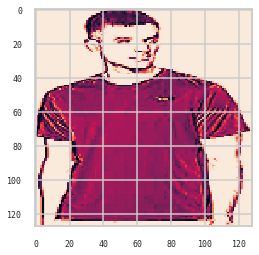

In [61]:
#the class 2 belongs to T_Shirt category, visualizing the image
im21st = testing.reshape((128,128))
plt.imshow(im21st)
plt.show()

Shape of test image (128, 128)


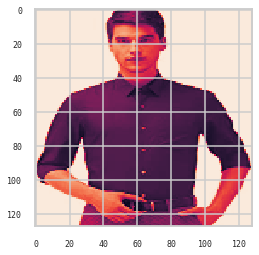

In [63]:
#doing prediction on an unseen image
test5 = cv2.imread(r"C:\Users\mishr\CNN\AUGUMENTED\test_folder\s6.jpg")
test5=cv2.cvtColor(test5, cv2.COLOR_BGR2GRAY)
test5=cv2.resize(test5,(128,128))
test5 = np.array(test5)
test5 = test5.astype('float32')
test5 =test5/255
print ("Shape of test image",test5.shape)

plt.imshow(test5)
plt.show()

In [64]:
#here the shape is (128,128) so iam defining the no of channel and sample so that it can be processed properly
if channel==1:
    if K.image_data_format()==("channels_first"):
        test_img= np.expand_dims(test5, axis=0)
        test_img= np.expand_dims(test5, axis=0)
        print (test_img.shape)
        print("\nTheano ordering has been used /n")
        print (test_img.shape)
    else:
        test_img= np.expand_dims(test5,axis=2) 
        test_img= np.expand_dims(test_img,axis=0)
        print("Tensorflow ordering has been used")
        print (test_img.shape)
else:
    if K.image_data_format()==("channels_first"):
        test_img=np.rollaxis(test5,2,0)  # here roll axis is for bringing the 3rd axis to 1st axis 
        print (img_data.shape)
    else:
        test_img= np.expand_dims(test5, axis=0)
        print (test_image.shape)


Tensorflow ordering has been used
(1, 128, 128, 1)


In [65]:
#predicting the class
print(SGD_MO_NEST.predict(test_img))
print("CLASS:", SGD_MO_NEST.predict_classes(test_img))


[[4.9372439e-09 9.9999869e-01 1.2915469e-06]]
CLASS: [1]


a correct pediction

**loading SGD_MOMT_NEST model with 0.025 LR**

In [66]:
SGD_MO_NEST=load_model(r"C:\Users\mishr\CNN\p4_saved_model\garment_MCP_sgd_mometum_nestrov0.025.h5")

testing = x_test[7:8]
print (testing.shape)
print(SGD_MO_NEST.predict(testing))
np.argmax(SGD_MO_NEST.predict(testing), axis=-1)

(1, 128, 128, 1)
[[2.3997705e-04 9.9508482e-01 4.6751862e-03]]


array([1], dtype=int64)

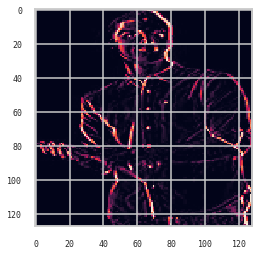

In [67]:
#the class 1 belongs to Shirt category, visualizing the image
im7TH = testing.reshape((128,128))
plt.imshow(im7TH)
plt.show()

Shape of test image (128, 128)


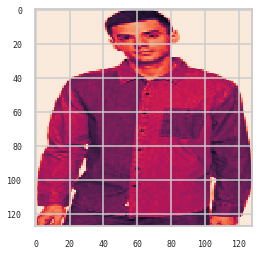

In [68]:
#doing prediction on an unseen image
test6 = cv2.imread(r"C:\Users\mishr\CNN\AUGUMENTED\test_folder\s4.jpg")
test6=cv2.cvtColor(test6, cv2.COLOR_BGR2GRAY)
test6=cv2.resize(test6,(128,128))
test6 = np.array(test6)
test6 = test6.astype('float32')
test6 =test6/255
print ("Shape of test image",test6.shape)

plt.imshow(test6)
plt.show()

In [69]:
#here the shape is (128,128) so iam defining the no of channel and sample so that it can be processed properly
if channel==1:
    if K.image_data_format()==("channels_first"):
        test_img= np.expand_dims(test6, axis=0)
        test_img= np.expand_dims(test6, axis=0)
        print (test_img.shape)
        print("\nTheano ordering has been used /n")
        print (test_img.shape)
    else:
        test_img= np.expand_dims(test6,axis=2) 
        test_img= np.expand_dims(test_img,axis=0)
        print("Tensorflow ordering has been used")
        print (test_img.shape)
else:
    if K.image_data_format()==("channels_first"):
        test_img=np.rollaxis(test6,2,0)  # here roll axis is for bringing the 3rd axis to 1st axis 
        print (img_data.shape)
    else:
        test_img= np.expand_dims(test6, axis=0)
        print (test_image.shape)


Tensorflow ordering has been used
(1, 128, 128, 1)


In [70]:
#predicting the class
print(SGD_MO_NEST.predict(test_img))
print("CLASS:", SGD_MO_NEST.predict_classes(test_img))


[[2.2776813e-04 9.9612588e-01 3.6464280e-03]]
CLASS: [1]


A CORRECT PREDICTION

**loading RMS PROP model with 0.001 LR**

In [71]:
RMS=load_model(r"C:\Users\mishr\CNN\p4_saved_model\garment_MCP_RMSPROP0.001.h5")

testing = x_test[22:23]
print (testing.shape)
print(RMS.predict(testing))
np.argmax(RMS.predict(testing), axis=-1)

(1, 128, 128, 1)
[[0.3151795  0.39649305 0.2883275 ]]


array([1], dtype=int64)

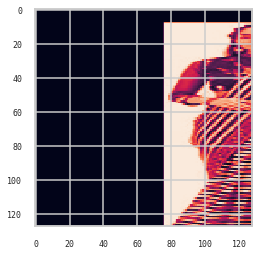

In [73]:
#the class 1 belongs to Shirt category, visualizing the image
im22ND = testing.reshape((128,128))
plt.imshow(im22ND)
plt.show()

A WRONG CLASSIFICATION

Shape of test image (128, 128)


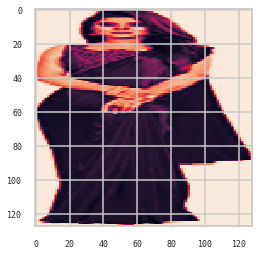

In [74]:
#doing prediction on an unseen image
test7 = cv2.imread(r"C:\Users\mishr\CNN\AUGUMENTED\test_folder\saree4.jpg")
test7=cv2.cvtColor(test7, cv2.COLOR_BGR2GRAY)
test7=cv2.resize(test7,(128,128))
test7 = np.array(test7)
test7 = test7.astype('float32')
test7 =test7/255
print ("Shape of test image",test7.shape)

plt.imshow(test7)
plt.show()


In [75]:
#here the shape is (128,128) so iam defining the no of channel and sample so that it can be processed properly
if channel==1:
    if K.image_data_format()==("channels_first"):
        test_img= np.expand_dims(test7, axis=0)
        test_img= np.expand_dims(test7, axis=0)
        print (test_img.shape)
        print("\nTheano ordering has been used /n")
        print (test_img.shape)
    else:
        test_img= np.expand_dims(test7,axis=2) 
        test_img= np.expand_dims(test_img,axis=0)
        print("Tensorflow ordering has been used")
        print (test_img.shape)
else:
    if K.image_data_format()==("channels_first"):
        test_img=np.rollaxis(test7,2,0)  # here roll axis is for bringing the 3rd axis to 1st axis 
        print (img_data.shape)
    else:
        test_img= np.expand_dims(test7, axis=0)
        print (test_image.shape)

Tensorflow ordering has been used
(1, 128, 128, 1)


In [76]:
#predicting the class
print(RMS.predict(test_img))
print("CLASS:", RMS.predict_classes(test_img))

[[1.0000000e+00 6.3600024e-23 1.5884152e-25]]
CLASS: [0]


**loading RMS PROP model with 0.01 LR**

In [77]:
RMS=load_model(r"C:\Users\mishr\CNN\p4_saved_model\garment_MCP_RMSPROP0.01.h5")

testing = x_test[49:50]
print (testing.shape)
print(RMS.predict(testing))
np.argmax(RMS.predict(testing), axis=-1)

(1, 128, 128, 1)
[[1.0000000e+00 3.5331457e-10 2.4425106e-11]]


array([0], dtype=int64)

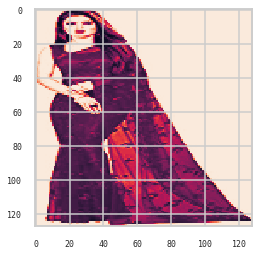

In [78]:
#the class 0 belongs to SAREE category, visualizing the image
im49TH = testing.reshape((128,128))
plt.imshow(im49TH)
plt.show()

A CORRECT PREDICTION

Shape of test image (128, 128)


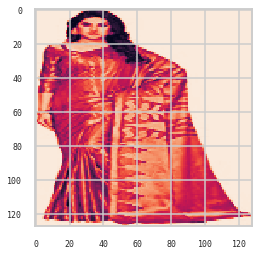

In [79]:
#doing prediction on an unseen image
test8 = cv2.imread(r"C:\Users\mishr\CNN\AUGUMENTED\test_folder\saree6.jpg")
test8=cv2.cvtColor(test8, cv2.COLOR_BGR2GRAY)
test8=cv2.resize(test8,(128,128))
test8 = np.array(test8)
test8 = test8.astype('float32')
test8 =test8/255
print ("Shape of test image",test8.shape)

plt.imshow(test8)
plt.show()


In [80]:
#here the shape is (128,128) so iam defining the no of channel and sample so that it can be processed properly
if channel==1:
    if K.image_data_format()==("channels_first"):
        test_img= np.expand_dims(test8, axis=0)
        test_img= np.expand_dims(test8, axis=0)
        print (test_img.shape)
        print("\nTheano ordering has been used /n")
        print (test_img.shape)
    else:
        test_img= np.expand_dims(test8,axis=2) 
        test_img= np.expand_dims(test_img,axis=0)
        print("Tensorflow ordering has been used")
        print (test_img.shape)
else:
    if K.image_data_format()==("channels_first"):
        test_img=np.rollaxis(test8,2,0)  # here roll axis is for bringing the 3rd axis to 1st axis 
        print (img_data.shape)
    else:
        test_img= np.expand_dims(test8, axis=0)
        print (test_image.shape)

Tensorflow ordering has been used
(1, 128, 128, 1)


In [81]:
#predicting the class
print(RMS.predict(test_img))
print("CLASS:", RMS.predict_classes(test_img))

[[9.9999607e-01 3.5480364e-06 3.2653904e-07]]
CLASS: [0]


A CORRECT PREDICTION

**loading RMS PROP model with 0.025 LR**

In [82]:
RMS=load_model(r"C:\Users\mishr\CNN\p4_saved_model\garment_MCP_RMSPROP0.025.h5")

testing = x_test[50:51]
print (testing.shape)
print(RMS.predict(testing))
np.argmax(RMS.predict(testing), axis=-1)

(1, 128, 128, 1)
[[0.07555309 0.42776453 0.4966824 ]]


array([2], dtype=int64)

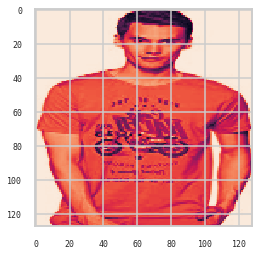

In [83]:
#the class 0 belongs to SAREE category, visualizing the image
im50th = testing.reshape((128,128))
plt.imshow(im50th)
plt.show()

a correct prediction

Shape of test image (128, 128)


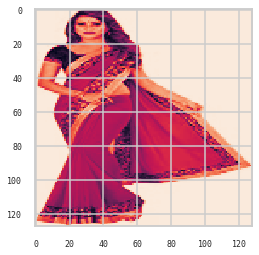

In [84]:
#doing prediction on an unseen image
test9 = cv2.imread(r"C:\Users\mishr\CNN\AUGUMENTED\test_folder\saree3.jpg")
test9=cv2.cvtColor(test9, cv2.COLOR_BGR2GRAY)
test9=cv2.resize(test9,(128,128))
test9 = np.array(test9)
test9 = test9.astype('float32')
test9 =test9/255
print ("Shape of test image",test8.shape)

plt.imshow(test9)
plt.show()


In [85]:
#here the shape is (128,128) so iam defining the no of channel and sample so that it can be processed properly
if channel==1:
    if K.image_data_format()==("channels_first"):
        test_img= np.expand_dims(test9, axis=0)
        test_img= np.expand_dims(test9, axis=0)
        print (test_img.shape)
        print("\nTheano ordering has been used /n")
        print (test_img.shape)
    else:
        test_img= np.expand_dims(test9,axis=2) 
        test_img= np.expand_dims(test_img,axis=0)
        print("Tensorflow ordering has been used")
        print (test_img.shape)
else:
    if K.image_data_format()==("channels_first"):
        test_img=np.rollaxis(test9,2,0)  # here roll axis is for bringing the 3rd axis to 1st axis 
        print (img_data.shape)
    else:
        test_img= np.expand_dims(test9, axis=0)
        print (test_image.shape)

Tensorflow ordering has been used
(1, 128, 128, 1)


In [86]:
#predicting the class
print(RMS.predict(test_img))
print("CLASS:", RMS.predict_classes(test_img))

[[9.9999738e-01 2.5572574e-06 7.1020089e-08]]
CLASS: [0]


predicted correct

**LOADING ADAM MODEL WITH 0.001 LR**

In [87]:
adam=load_model(r"C:\Users\mishr\CNN\p4_saved_model\garment_MCP_ADAM0.001.h5")

testing = x_test[3:4]
print (testing.shape)
print(adam.predict(testing))
np.argmax(adam.predict(testing), axis=-1)

(1, 128, 128, 1)
[[2.7944931e-11 2.2407635e-03 9.9775922e-01]]


array([2], dtype=int64)

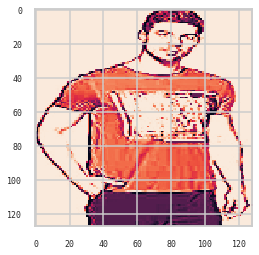

In [88]:
#the class 2 belongs to T_Shirt category, visualizing the image
im3rd = testing.reshape((128,128))
plt.imshow(im3rd)
plt.show()


Shape of test image (128, 128)


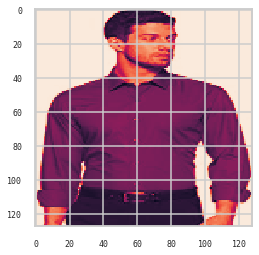

In [89]:
#doing prediction on an unseen image
test10 = cv2.imread(r"C:\Users\mishr\CNN\AUGUMENTED\test_folder\s1.jpg")
test10=cv2.cvtColor(test10, cv2.COLOR_BGR2GRAY)
test10=cv2.resize(test10,(128,128))
test10 = np.array(test10)
test10 = test10.astype('float32')
test10 =test10/255
print ("Shape of test image",test10.shape)

plt.imshow(test10)
plt.show()

In [90]:
if channel==1:
    if K.image_data_format()==("channels_first"):
        test_img= np.expand_dims(test10, axis=0)
        test_img= np.expand_dims(test10, axis=0)
        print (test_img.shape)
        print("\nTheano ordering has been used /n")
        print (test_img.shape)
    else:
        test_img= np.expand_dims(test10,axis=2) 
        test_img= np.expand_dims(test_img,axis=0)
        print("Tensorflow ordering has been used")
        print (test_img.shape)
else:
    if K.image_data_format()==("channels_first"):
        test_img=np.rollaxis(test10,2,0)  # here roll axis is for bringing the 3rd axis to 1st axis 
        print (img_data.shape)
    else:
        test_img= np.expand_dims(test10, axis=0)
        print (test_image.shape)

Tensorflow ordering has been used
(1, 128, 128, 1)


In [91]:
#predicting the class
print(adam.predict(test_img))
print("CLASS:", adam.predict_classes(test_img))

[[7.3782408e-10 9.9965429e-01 3.4575028e-04]]
CLASS: [1]


predicted correctly

**loading adam with lr 0.01**

In [92]:
adam=load_model(r"C:\Users\mishr\CNN\p4_saved_model\garment_MCP_ADAM0.01.h5")

testing = x_test[111:112]
print (testing.shape)
print(adam.predict(testing))
np.argmax(adam.predict(testing), axis=-1)

(1, 128, 128, 1)
[[4.7283241e-12 4.8503915e-07 9.9999952e-01]]


array([2], dtype=int64)

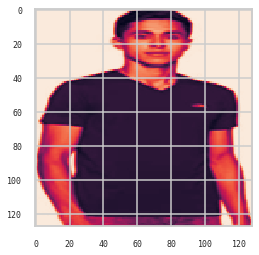

In [93]:
#the class 2 belongs to T_Shirt category, visualizing the image
im111 = testing.reshape((128,128))
plt.imshow(im111)
plt.show()


Shape of test image (128, 128)


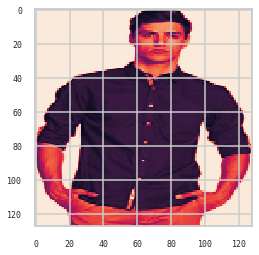

In [94]:
#doing prediction on an unseen image
test11 = cv2.imread(r"C:\Users\mishr\CNN\AUGUMENTED\test_folder\imgshirt_605.jpeg")
test11=cv2.cvtColor(test11, cv2.COLOR_BGR2GRAY)
test11=cv2.resize(test11,(128,128))
test11 = np.array(test11)
test11 = test11.astype('float32')
test11 =test11/255
print ("Shape of test image",test11.shape)

plt.imshow(test11)
plt.show()


In [95]:
if channel==1:
    if K.image_data_format()==("channels_first"):
        test_img= np.expand_dims(test11, axis=0)
        test_img= np.expand_dims(test11, axis=0)
        print (test_img.shape)
        print("\nTheano ordering has been used /n")
        print (test_img.shape)
    else:
        test_img= np.expand_dims(test11,axis=2) 
        test_img= np.expand_dims(test_img,axis=0)
        print("Tensorflow ordering has been used")
        print (test_img.shape)
else:
    if K.image_data_format()==("channels_first"):
        test_img=np.rollaxis(test11,2,0)  # here roll axis is for bringing the 3rd axis to 1st axis 
        print (img_data.shape)
    else:
        test_img= np.expand_dims(test11, axis=0)
        print (test_image.shape)


Tensorflow ordering has been used
(1, 128, 128, 1)


In [96]:
print(adam.predict(test_img))
print("CLASS:", adam.predict_classes(test_img))


[[1.4976749e-08 9.9884534e-01 1.1546320e-03]]
CLASS: [1]


correct prediction

**loading adam with lr 0.025**

In [99]:
adam=load_model(r"C:\Users\mishr\CNN\p4_saved_model\garment_MCP_ADAM0.025.h5")

testing = x_test[124:125]
print (testing.shape)
print(adam.predict(testing))
np.argmax(adam.predict(testing), axis=-1)

(1, 128, 128, 1)
[[0.31733477 0.32390627 0.35875896]]


array([2], dtype=int64)

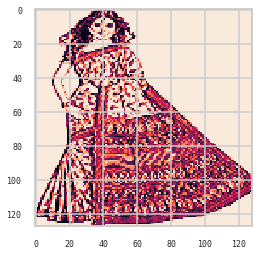

In [100]:
im124 = testing.reshape((128,128))
plt.imshow(im124)
plt.show()


a wrong prediction